库：

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

函数：

In [41]:
def read_triples(filepath:str):
    triples = []
    with open(filepath) as f:
        for line in f:
            data_instance = json.loads(line)
            triples.append(data_instance)
    return triples

KAMEL_207 整体分析：

In [42]:
# check kamel status
file_path = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/kamel_with_sub_entity_pop_edited'

results_all = {}

for subdirectory in os.listdir(file_path):
    results_p = []
    if subdirectory.startswith('P'):
        f = os.path.join(file_path, subdirectory)
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'test.jsonl'))

    for item in test:
        results_p.append(item['sub_pop'])
    results_all[subdirectory] = results_p#{'P136': [635, 3502],..}

results_all_mean = {}#{'P136': 3622, 'P1376': 6337}
for k,v in results_all.items():
    results_all_mean[k]= int(np.mean(v))

sorted_results_all_mean = dict(sorted(results_all_mean.items(),key=lambda x:x[1],reverse=True))

property = list(sorted_results_all_mean.keys())
mean_pop = list(sorted_results_all_mean.values())

In [43]:
import pandas as pd
df = pd.DataFrame(list(sorted_results_all_mean.items()), columns=['property', 'mean_pop'])
df.describe()

,mean_pop
count,207.000000
mean,6321.169082
std,11768.107278
min,96.000000
25%,1130.000000
50%,3560.000000
75%,6607.000000
max,134088.000000


/var/folders/lg/rb33l3k905gcrmj9l6jvdcsw0000gn/T/ipykernel_33069/2889602883.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(property, fontsize=8)


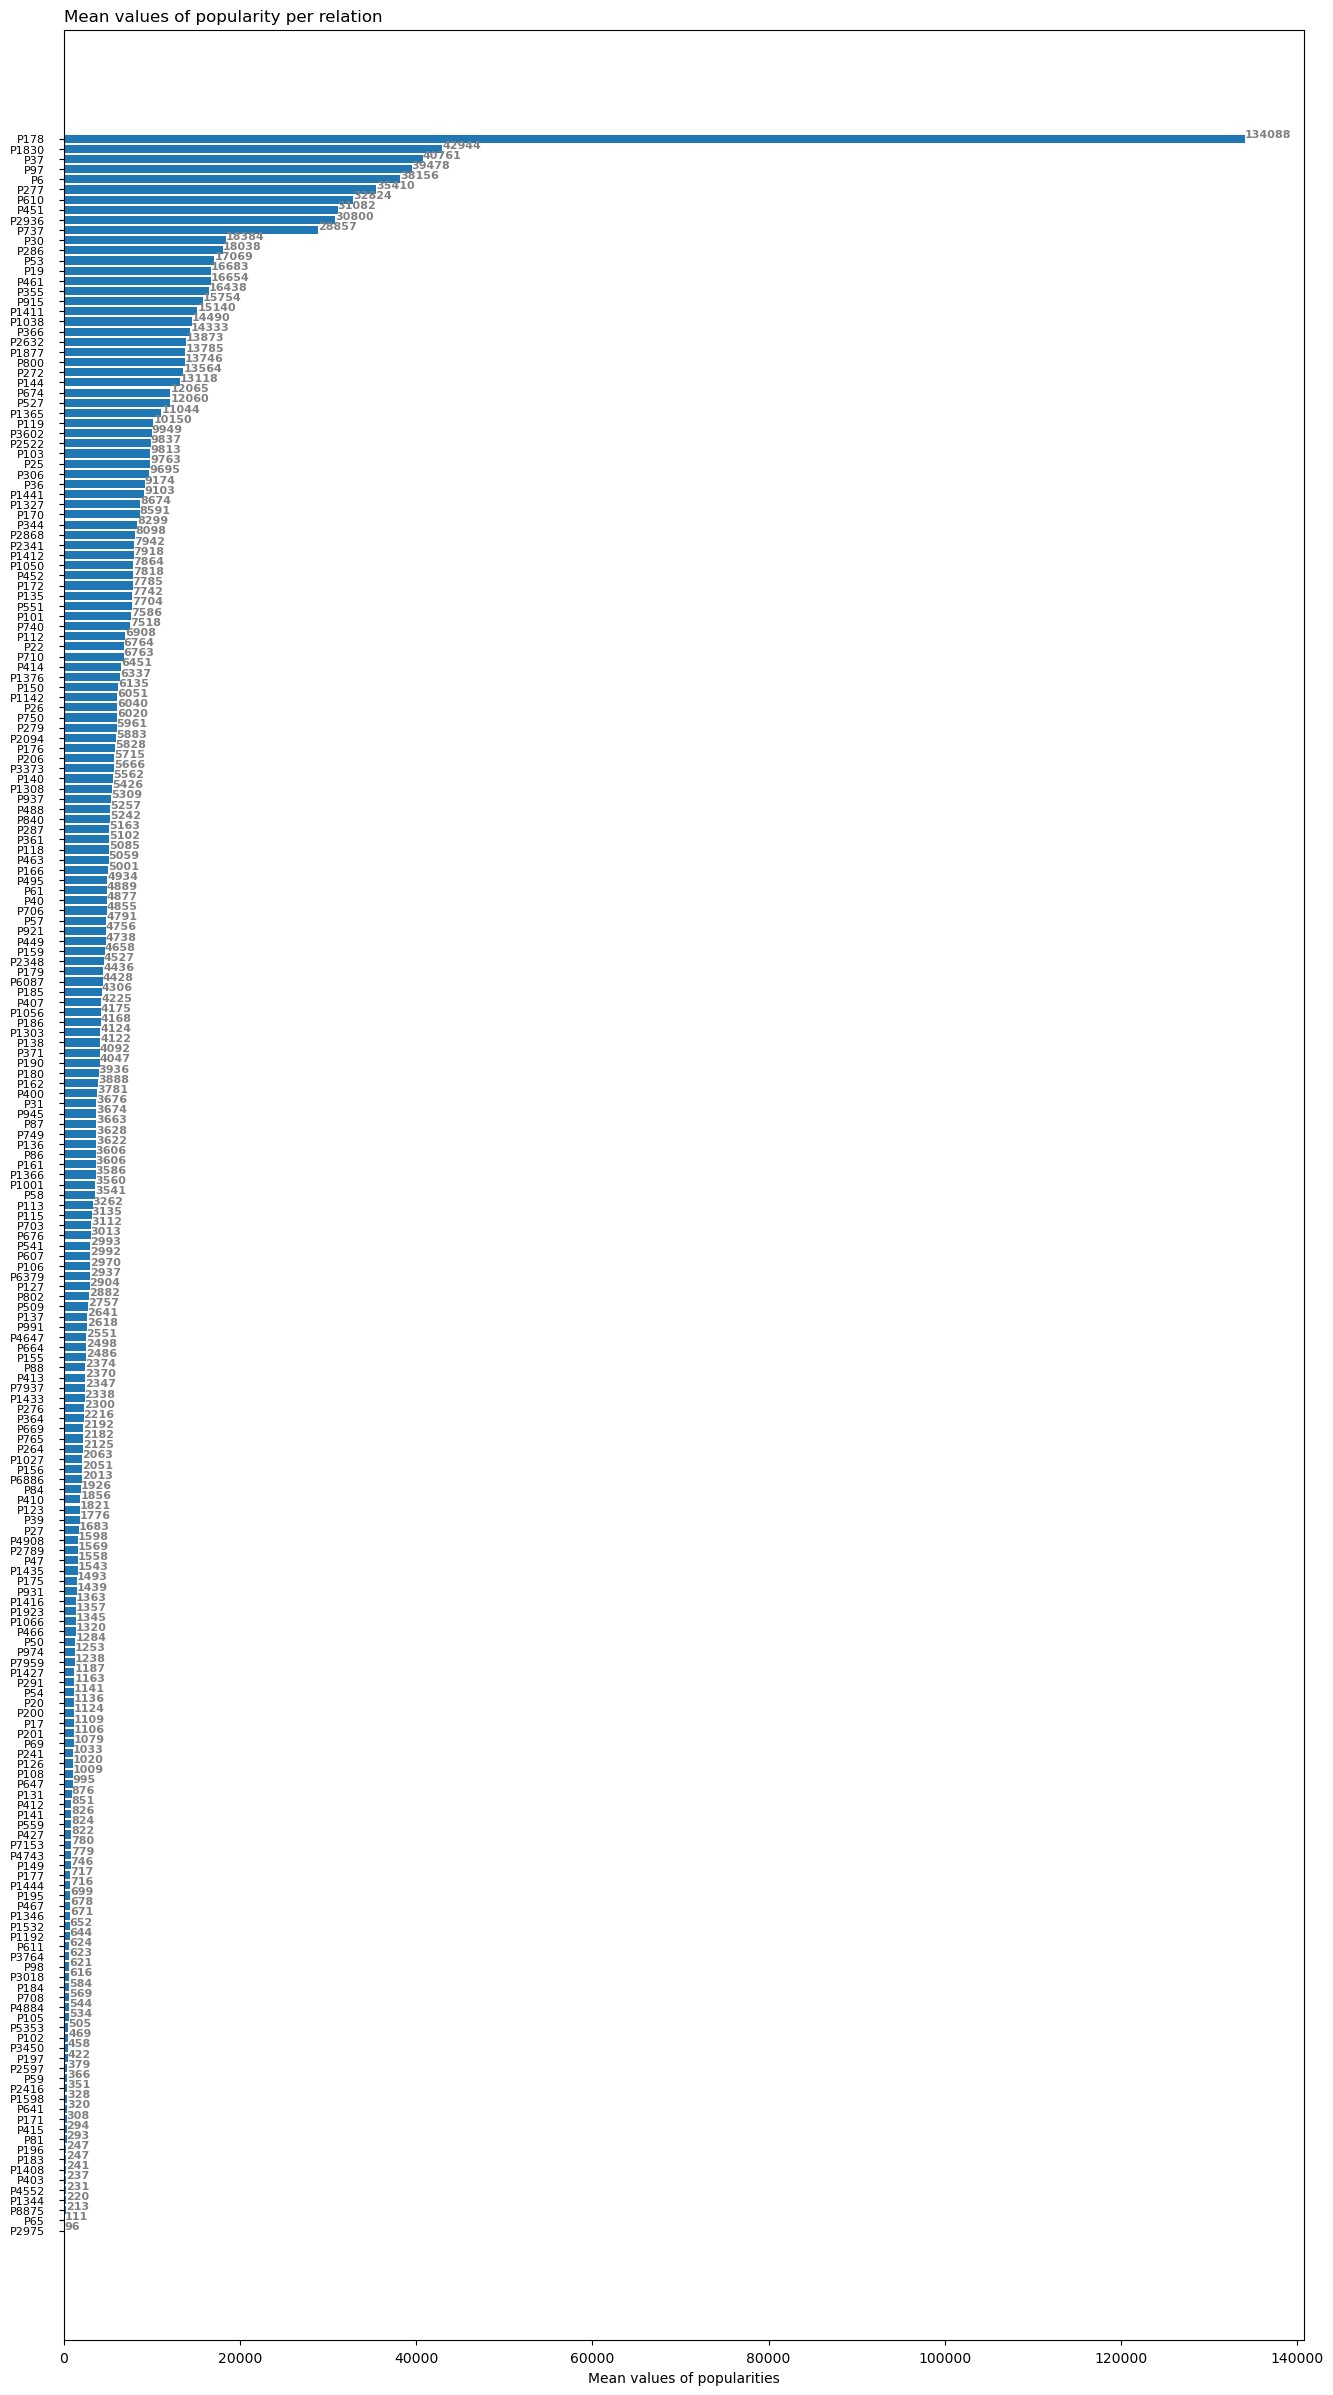

In [44]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 30))

# Horizontal Bar Plot
ax.barh(property, mean_pop)

# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=8, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Mean values of popularity per relation',
             loc='left')

# Add x-axis label
ax.set_xlabel('Mean values of popularities')

# Adjust y-axis tick label font size
ax.set_yticklabels(property, fontsize=8)

# Show Plot
plt.show()


In [45]:
#生成附录pop列表，pop是每个prop下的均值

import pandas as pd
import matplotlib.pyplot as plt

# data from the plot
# property = ['Property A', 'Property B', 'Property C', 'Property D', 'Property E']
# mean_pop = [8.7, 7.9, 6.3, 5.6, 3.2]

# create a pandas DataFrame with the data
df = pd.DataFrame({'Relation': property, 'Mean values of popularities': mean_pop})

# print the DataFrame
print(df)

# # save the table as LaTeX
# with open('Mean values of popularities.tex', 'w') as f:
#     f.write(df.to_latex(index=False))


    Relation  Mean values of popularities
0       P178                       134088
1      P1830                        42944
2        P37                        40761
3        P97                        39478
4         P6                        38156
..       ...                          ...
202    P4552                          231
203    P1344                          220
204    P8875                          213
205      P65                          111
206    P2975                           96

[207 rows x 2 columns]


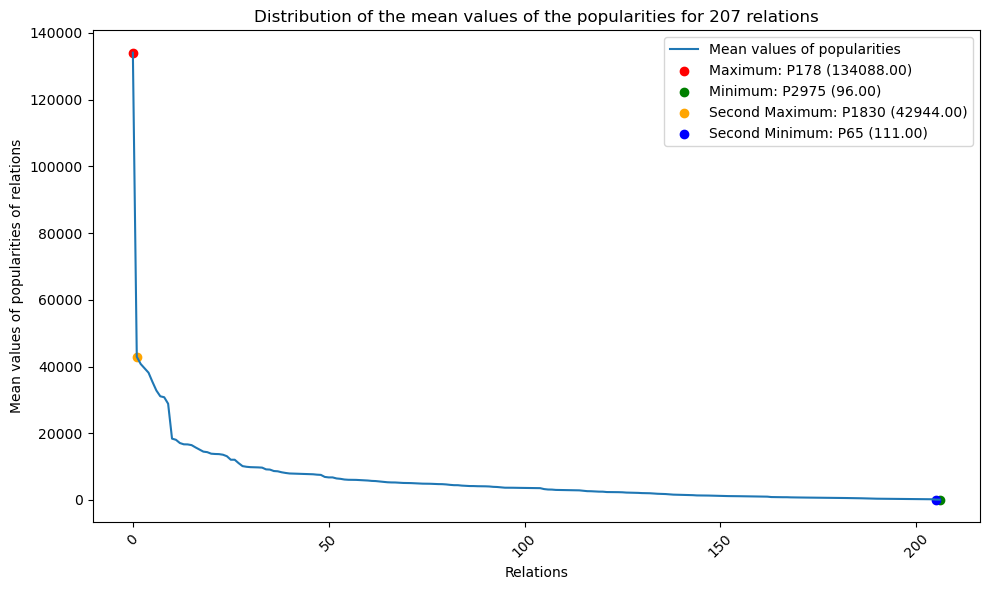

In [46]:
import matplotlib.pyplot as plt

# Get the index of the maximum and minimum values
max_index = mean_pop.index(max(mean_pop))
min_index = mean_pop.index(min(mean_pop))

# Get the index of the second maximum and minimum values
sorted_mean_pop = sorted(mean_pop)
second_max_index = mean_pop.index(sorted_mean_pop[-2])
second_min_index = mean_pop.index(sorted_mean_pop[1])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data as a continuous line
ax.plot(mean_pop, label='Mean values of popularities')

# Mark the maximum and minimum points with red and green dots respectively
ax.scatter(max_index, mean_pop[max_index], color='red', label=f'Maximum: {property[max_index]} ({mean_pop[max_index]:.2f})')
ax.scatter(min_index, mean_pop[min_index], color='green', label=f'Minimum: {property[min_index]} ({mean_pop[min_index]:.2f})')

# Mark the second maximum and minimum points with orange and blue dots respectively
ax.scatter(second_max_index, mean_pop[second_max_index], color='orange', label=f'Second Maximum: {property[second_max_index]} ({mean_pop[second_max_index]:.2f})')
ax.scatter(second_min_index, mean_pop[second_min_index], color='blue', label=f'Second Minimum: {property[second_min_index]} ({mean_pop[second_min_index]:.2f})')

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Mean values of popularities of relations')
ax.set_title('Distribution of the mean values of the popularities for 207 relations')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()


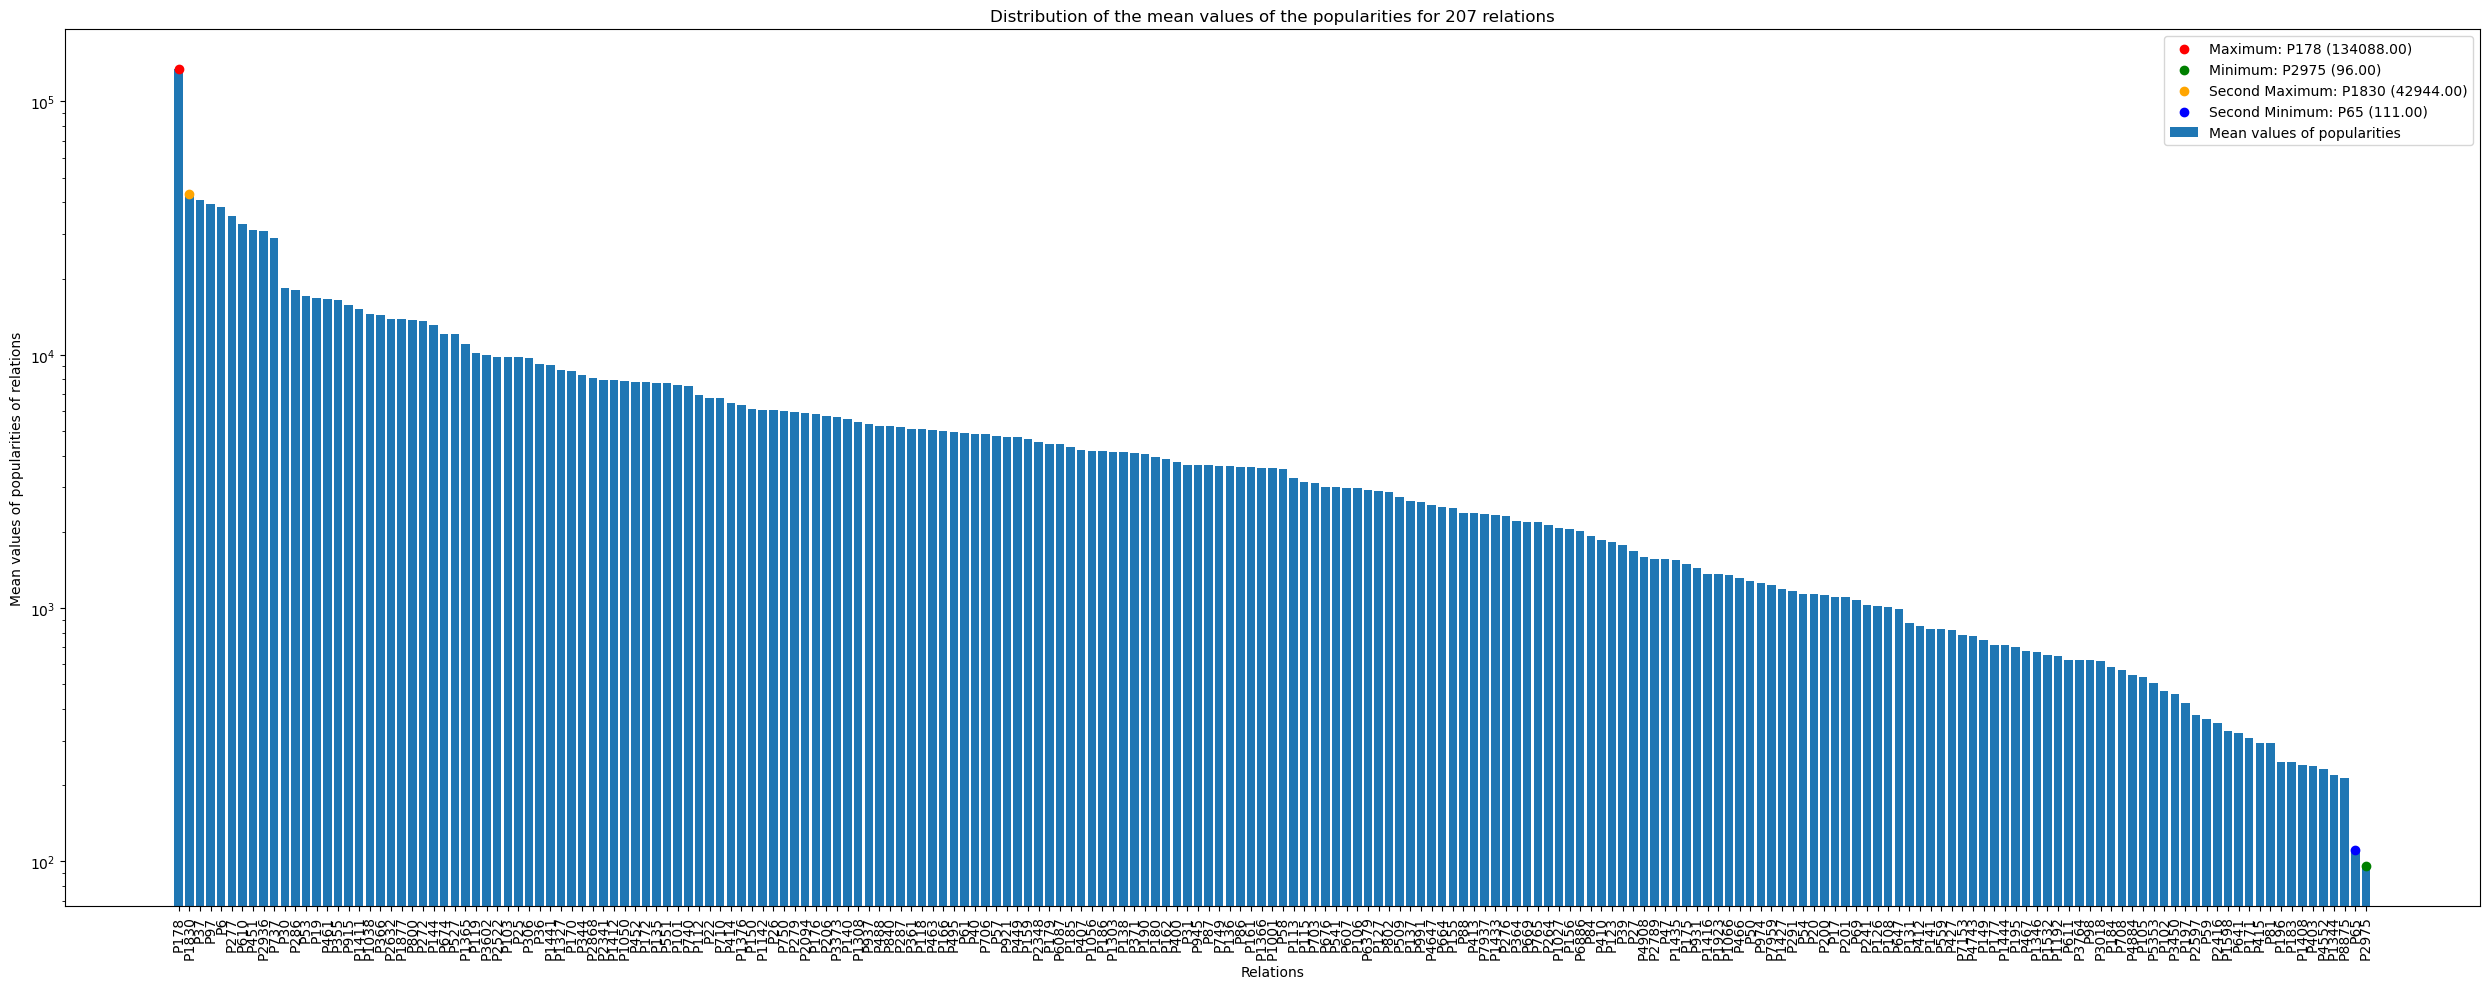

In [47]:
#tmp for re-order 207
import matplotlib.pyplot as plt

# Get the index of the maximum and minimum values
max_index = mean_pop.index(max(mean_pop))
min_index = mean_pop.index(min(mean_pop))

# Get the index of the second maximum and minimum values
sorted_mean_pop = sorted(mean_pop,reverse=True)
second_max_index = mean_pop.index(sorted_mean_pop[1])
second_min_index = mean_pop.index(sorted_mean_pop[-2])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(25,10))#10,6

# Plot the data as a continuous line
ax.bar(property,sorted_mean_pop,width=0.8,log=True,label='Mean values of popularities')#plot(sorted_mean_pop, label='Mean values of popularities')#mean_pop,log=True

# Mark the maximum and minimum points with red and green dots respectively
ax.scatter(max_index, mean_pop[max_index], color='red', label=f'Maximum: {property[max_index]} ({mean_pop[max_index]:.2f})')
ax.scatter(min_index, mean_pop[min_index], color='green', label=f'Minimum: {property[min_index]} ({mean_pop[min_index]:.2f})')

# Mark the second maximum and minimum points with orange and blue dots respectively
ax.scatter(second_max_index, mean_pop[second_max_index], color='orange', label=f'Second Maximum: {property[second_max_index]} ({mean_pop[second_max_index]:.2f})')
ax.scatter(second_min_index, mean_pop[second_min_index], color='blue', label=f'Second Minimum: {property[second_min_index]} ({mean_pop[second_min_index]:.2f})')

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Mean values of popularities of relations')
ax.set_title('Distribution of the mean values of the popularities for 207 relations')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()


KAMEL_20 分析：

In [48]:
# check kamel 20 status
file_path_20 = 'Part1/kamel_20_pop'

results_all_20 = {}

for subdirectory in os.listdir(file_path_20):
    results = []
    if subdirectory.startswith('P'):
        f = os.path.join(file_path_20, subdirectory)
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'test.jsonl'))

    for item in test:
        results.append(item['sub_pop'])
    results_all_20[subdirectory] = results#{'P136': [635, 3502],..}

results_20_mean = {}#{'P136': 3622, 'P1376': 6337}
for k,v in results_all_20.items():
    results_20_mean[k]= int(np.mean(v))

sorted_results_20_mean = dict(sorted(results_20_mean.items(),key=lambda x:x[1],reverse=True))

property_20 = list(sorted_results_20_mean.keys())
mean_pop_20 = list(sorted_results_20_mean.values())

In [49]:
print(sorted_results_20_mean)

{'P277': 44122, 'P103': 9985, 'P1142': 7251, 'P170': 7246, 'P1441': 6488, 'P371': 4450, 'P115': 4370, 'P407': 4162, 'P400': 3518, 'P127': 3459, 'P97': 3319, 'P1433': 3225, 'P30': 3216, 'P541': 2101, 'P4884': 493, 'P4743': 271, 'P8875': 244, 'P4552': 180, 'P105': 164, 'P196': 116}


In [50]:
import pandas as pd
df = pd.DataFrame(list(sorted_results_20_mean.items()), columns=['property_20', 'mean_pop_20'])
df.describe()

,mean_pop_20
count,20.000000
mean,5419.000000
std,9524.207993
min,116.000000
25%,437.500000
50%,3389.000000
75%,4959.500000
max,44122.000000


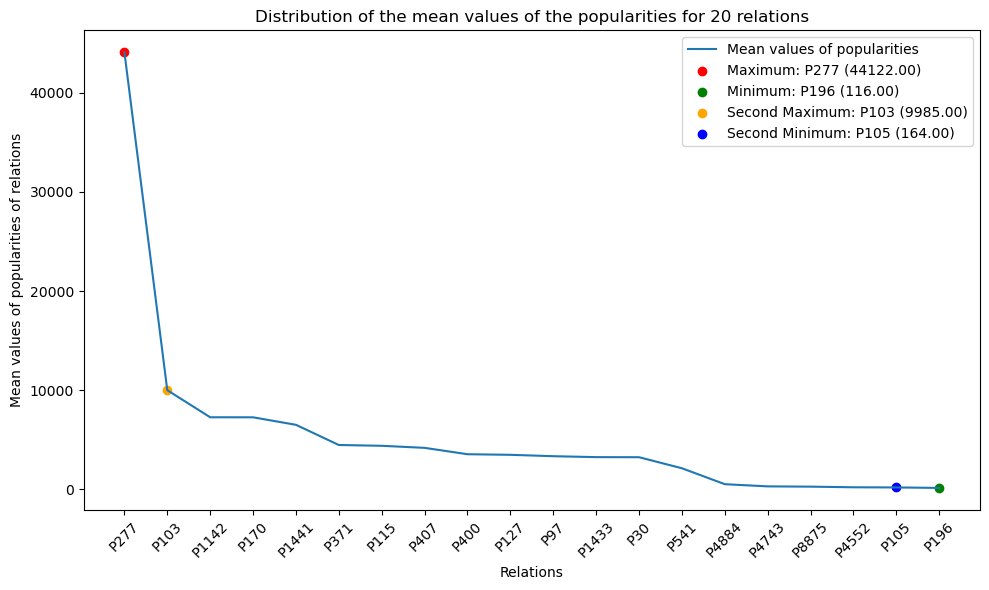

In [51]:
import matplotlib.pyplot as plt

# Get the index of the maximum and minimum values
max_index_20 = mean_pop_20.index(max(mean_pop_20))
min_index_20 = mean_pop_20.index(min(mean_pop_20))

# Get the index of the second maximum and minimum values
sorted_mean_pop_20 = sorted(mean_pop_20)
second_max_index_20 = mean_pop_20.index(sorted_mean_pop_20[-2])
second_min_index_20 = mean_pop_20.index(sorted_mean_pop_20[1])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data as a continuous line
ax.plot(mean_pop_20, label='Mean values of popularities')

# Mark the maximum and minimum points with red and green dots respectively
ax.scatter(max_index_20, mean_pop_20[max_index_20], color='red', label=f'Maximum: {property_20[max_index_20]} ({mean_pop_20[max_index_20]:.2f})')
ax.scatter(min_index_20, mean_pop_20[min_index_20], color='green', label=f'Minimum: {property_20[min_index_20]} ({mean_pop_20[min_index_20]:.2f})')

# Mark the second maximum and minimum points with orange and blue dots respectively
ax.scatter(second_max_index_20, mean_pop_20[second_max_index_20], color='orange', label=f'Second Maximum: {property_20[second_max_index_20]} ({mean_pop_20[second_max_index_20]:.2f})')
ax.scatter(second_min_index_20, mean_pop_20[second_min_index_20], color='blue', label=f'Second Minimum: {property_20[second_min_index_20]} ({mean_pop_20[second_min_index_20]:.2f})')

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Mean values of popularities of relations')
ax.set_title('Distribution of the mean values of the popularities for 20 relations')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

ax.set_xticks(range(len(property_20)))
ax.set_xticklabels(property_20)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()


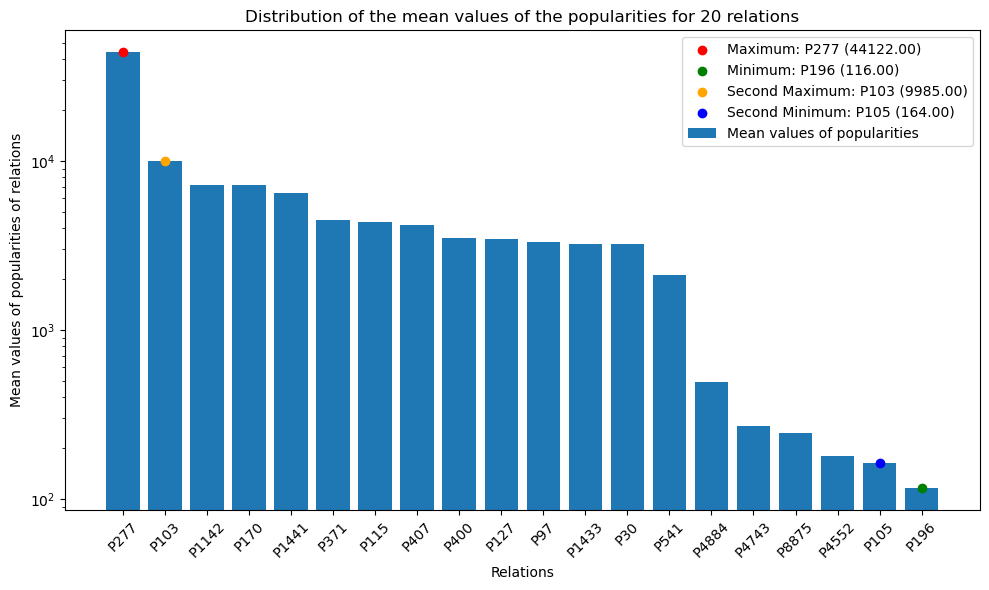

In [52]:
#tmp for re-order 20
import matplotlib.pyplot as plt

# Get the index of the maximum and minimum values
max_index_20 = mean_pop_20.index(max(mean_pop_20))
min_index_20 = mean_pop_20.index(min(mean_pop_20))

# Get the index of the second maximum and minimum values
sorted_mean_pop_20 = sorted(mean_pop_20,reverse=True)
second_max_index_20 = mean_pop_20.index(sorted_mean_pop_20[1])
second_min_index_20 = mean_pop_20.index(sorted_mean_pop_20[-2])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data as a continuous line
ax.bar(property_20,sorted_mean_pop_20,width=0.8,log=True,label='Mean values of popularities')#plot(sorted_mean_pop_20, label='Mean values of popularities'),log=True

# Mark the maximum and minimum points with red and green dots respectively
ax.scatter(max_index_20, mean_pop_20[max_index_20], color='red', label=f'Maximum: {property_20[max_index_20]} ({mean_pop_20[max_index_20]:.2f})')
ax.scatter(min_index_20, mean_pop_20[min_index_20], color='green', label=f'Minimum: {property_20[min_index_20]} ({mean_pop_20[min_index_20]:.2f})')

# Mark the second maximum and minimum points with orange and blue dots respectively
ax.scatter(second_max_index_20, mean_pop_20[second_max_index_20], color='orange', label=f'Second Maximum: {property_20[second_max_index_20]} ({mean_pop_20[second_max_index_20]:.2f})')
ax.scatter(second_min_index_20, mean_pop_20[second_min_index_20], color='blue', label=f'Second Minimum: {property_20[second_min_index_20]} ({mean_pop_20[second_min_index_20]:.2f})')

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Mean values of popularities of relations')
ax.set_title('Distribution of the mean values of the popularities for 20 relations')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

ax.set_xticks(range(len(property_20)))
ax.set_xticklabels(property_20)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()


In [53]:
from scipy.stats import shapiro
import pandas as pd

# load the dataset
df_opt = pd.read_csv('/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/opt_10.csv',sep=';', index_col=0)
df_rag = pd.read_csv('/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/rag_token_0.csv',sep=';', index_col=0)

# extract the 'F1' column
f1_opt = df_opt['F1']
f1_rag = df_rag['F1']
pop_opt = df_opt['Popularity']
pop_rag = df_rag['Popularity']

# perform the Shapiro-Wilk test
stat_f1_opt, p_f1_opt = shapiro(f1_opt)
stat_f1_rag, p_f1_rag = shapiro(f1_rag)
stat_pop_opt, p_pop_opt = shapiro(pop_opt)
stat_pop_rag, p_pop_rag = shapiro(pop_rag)

# print the results
print('Shapiro-Wilk test for OPT F1:')
print('Statistic = %.3f, p-value = %.3f' % (stat_f1_opt, p_f1_opt))

if p_f1_opt > 0.05:
    print('The distribution of OPT F1 is approximately normal.')
else:
    print('The distribution of OPT F1 is not normal.')

print('Shapiro-Wilk test for RAG F1:')
print('Statistic = %.3f, p-value = %.3f' % (stat_f1_rag, p_f1_rag))

if p_f1_rag > 0.05:
    print('The distribution of RAG F1 is approximately normal.')
else:
    print('The distribution of RAG F1 is not normal.')

print('Shapiro-Wilk test for OPT pop:')
print('Statistic = %.3f, p-value = %.3f' % (stat_pop_opt, p_pop_opt))

if p_pop_opt > 0.05:
    print('The distribution of OPT pop is approximately normal.')
else:
    print('The distribution of OPT pop is not normal.')

print('Shapiro-Wilk test for RAG pop:')
print('Statistic = %.3f, p-value = %.3f' % (stat_pop_rag, p_pop_rag))

if p_pop_rag > 0.05:
    print('The distribution of RAG pop is approximately normal.')
else:
    print('The distribution of RAG pop is not normal.')


Shapiro-Wilk test for OPT F1:
Statistic = 0.842, p-value = 0.004
The distribution of OPT F1 is not normal.
Shapiro-Wilk test for RAG F1:
Statistic = 0.855, p-value = 0.007
The distribution of RAG F1 is not normal.
Shapiro-Wilk test for OPT pop:
Statistic = 0.493, p-value = 0.000
The distribution of OPT pop is not normal.
Shapiro-Wilk test for RAG pop:
Statistic = 0.493, p-value = 0.000
The distribution of RAG pop is not normal.


In [54]:
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset into a pandas dataframe
df_opt = pd.read_csv('/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/opt_10.csv',sep=';', index_col=0)

# Select the two columns of interest
columns_opt = ['F1', 'Popularity']
#data_opt = df_opt[columns_opt]
data_opt = df_opt.loc[:, columns_opt]

# Calculate the Spearman's rank correlation coefficient
corr_coef_opt, p_value_opt = spearmanr(data_opt)

# Print the correlation coefficient and p-value
print(f"Spearman's correlation coefficient: {corr_coef_opt:.3f}")
print(f"p-value: {p_value_opt:.3f}")


#p-value less than 0.05 indicating a statistically significant correlation.

Spearman's correlation coefficient: -0.455
p-value: 0.044


In [55]:
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset into a pandas dataframe
df_rag = pd.read_csv('/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/rag_token_0.csv',sep=';', index_col=0)

# Select the two columns of interest
columns_rag = ['F1', 'Popularity']
#data_opt = df_opt[columns_opt]
data_rag = df_rag.loc[:, columns_rag]

# Calculate the Spearman's rank correlation coefficient
corr_coef_rag, p_value_rag = spearmanr(data_rag)

# Print the correlation coefficient and p-value
print(f"Spearman's correlation coefficient: {corr_coef_rag:.3f}")
print(f"p-value: {p_value_rag:.3f}")


#p-value less than 0.05 indicating a statistically significant correlation.

Spearman's correlation coefficient: 0.663
p-value: 0.001


模型预测差异分析：

Property分析：

In [56]:
# # check acc and pop -rag #目前不用，先别删！目前不用，先别删！目前不用，先别删！
# file_path_rag = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part2/for_compare_pop/rag/kamel_20_pop'

# #results_all_rag = {}
# from collections import defaultdict
# tree = lambda: defaultdict(tree)
# results_all_rag = tree()

# for subdirectory in os.listdir(file_path_rag):#P196
#     results = []
#     if subdirectory.startswith('P'):
#         f = os.path.join(file_path_rag, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
#     else:
#         continue

#     # checking if it is a file
#     if os.path.isdir(f):
#         test = read_triples(os.path.join(f, 'predictions_facebookrag-token-nq_fewshot_0.jsonl'))
    
#     acc_counter = 0
    
#     for item in test:
#         results.append(item['sub_pop'])
#         if item['prediction'].lower() == item['obj_label'][0]['chosen'].lower():
#             acc_counter += 1

#     pop_mean = int(np.mean(results))
#     acc = (acc_counter/len(test))
    
#     results_all_rag[subdirectory]['pop'] = pop_mean
#     results_all_rag[subdirectory]['acc']= acc
# print(results_all_rag)

In [57]:
# check acc and pop -opt
file_path_opt = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/10shot_opt_train/kamel_20_pop_full'#'/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part2/for_compare_pop/opt/kamel_20_pop'

#results_all_opt = {}
from collections import defaultdict
tree = lambda: defaultdict(tree)
results_all_opt = tree()

for subdirectory in os.listdir(file_path_opt):#P196
    results = []
    if subdirectory.startswith('P'):
        f = os.path.join(file_path_opt, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookopt-13b_fewshot_10.jsonl'))
    
    acc_counter = 0
    
    for item in test:
        results.append(item['sub_pop'])
        for label in item['obj_label']:
            if item['prediction'].lower().replace('%','') == label.lower():
        #if item['prediction'].lower().replace('%','') == item['obj_label'].lower():#
                acc_counter += 1

    pop_mean = int(np.mean(results))
    acc = (acc_counter/len(test))
    
    results_all_opt[subdirectory]['pop'] = pop_mean
    results_all_opt[subdirectory]['acc']= acc
print(results_all_opt)

defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'P196': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 210, 'acc': 0.852}), 'P1142': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6112, 'acc': 0.13}), 'P277': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 8072, 'acc': 0.347}), 'P1441': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 9601, 'acc': 0.219}), 'P170': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6744, 'acc': 0.084}), 'P115': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6541, 'acc': 0.305}), 'P541': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 2317, 'acc': 0.892}), 'P103': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 11814, 'acc': 0.604}), 'P105': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 537, 'acc': 0.893}), 'P4743': defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 543, 'acc': 0.894}), 'P1433': defaultdict(<function <lambda> at 0x7fe3d900eee0>

In [58]:
# check acc and pop -ft    这块的ft可能用的是mini，先忽略
file_path_ft = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/0shot_rag_token_ft_train/kamel_20_pop_full'#'/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part2/for_compare_pop/ft/kamel_20_pop'

#results_all_ft = {}
from collections import defaultdict
tree = lambda: defaultdict(tree)
results_all_ft = tree()

for subdirectory in os.listdir(file_path_ft):#P196
    results = []
    if subdirectory.startswith('P'):
        f = os.path.join(file_path_ft, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookrag-token-base-ft_fewshot_0.jsonl'))
    
    acc_counter = 0
    
    for item in test:
        results.append(item['sub_pop'])
        for label in item['obj_label']:
            if item['prediction'].lower() == label.lower():
        #if item['prediction'].lower() == item['obj_label'][0]['chosen'].lower():
                acc_counter += 1

    pop_mean = int(np.mean(results))
    acc = (acc_counter/len(test))
    
    results_all_ft[subdirectory]['pop'] = pop_mean
    results_all_ft[subdirectory]['acc']= acc
print(results_all_ft)

defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'P196': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 210, 'acc': 0.89}), 'P1142': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 6112, 'acc': 0.145}), 'P277': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 8072, 'acc': 0.528}), 'P1441': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 9601, 'acc': 0.128}), 'P170': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 6744, 'acc': 0.26}), 'P115': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 6541, 'acc': 0.334}), 'P541': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 2317, 'acc': 0.892}), 'P103': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 11814, 'acc': 0.452}), 'P105': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 537, 'acc': 0.636}), 'P4743': defaultdict(<function <lambda> at 0x7fe3d900eca0>, {'pop': 543, 'acc': 0.915}), 'P1433': defaultdict(<function <lambda> at 0x7fe3d900eca0>,

In [59]:
# # check acc and pop -ensemble #目前不用，先别删！目前不用，先别删！目前不用，先别删！
# file_path_ensemble = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/ensemble_v4/kamel_20_pop'

# #results_all_ft = {}
# from collections import defaultdict
# tree = lambda: defaultdict(tree)
# results_all_ensemble = tree()

# for subdirectory in os.listdir(file_path_ensemble):#P196
#     results = []
#     if subdirectory.startswith('P'):
#         f = os.path.join(file_path_ensemble, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
#     else:
#         continue

#     # checking if it is a file
#     if os.path.isdir(f):
#         test = read_triples(os.path.join(f, 'predictions_ensemble_fewshot_10.jsonl'))
    
#     acc_counter = 0
    
#     for item in test:
#         results.append(item['sub_pop'])
#         if item['prediction'].lower() == item['obj_label'][0]['chosen'].lower():
#             acc_counter += 1

#     pop_mean = int(np.mean(results))
#     acc = (acc_counter/len(test))
    
#     results_all_ensemble[subdirectory]['pop'] = pop_mean
#     results_all_ensemble[subdirectory]['acc']= acc
# print(results_all_ensemble)

In [60]:
#print(results_all_rag.items())
print(results_all_opt.items())
print(results_all_ft.items())
#print(results_all_ensemble.items())

dict_items([('P196', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 210, 'acc': 0.852})), ('P1142', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6112, 'acc': 0.13})), ('P277', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 8072, 'acc': 0.347})), ('P1441', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 9601, 'acc': 0.219})), ('P170', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6744, 'acc': 0.084})), ('P115', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6541, 'acc': 0.305})), ('P541', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 2317, 'acc': 0.892})), ('P103', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 11814, 'acc': 0.604})), ('P105', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 537, 'acc': 0.893})), ('P4743', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 543, 'acc': 0.894})), ('P1433', defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 4314, 'ac

P196
{'opt_acc': 0.852, 'rag_ft_acc': 0.89}


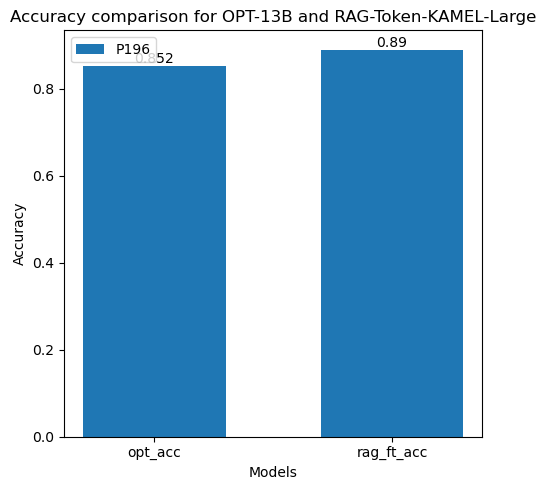

P1142
{'opt_acc': 0.13, 'rag_ft_acc': 0.145}


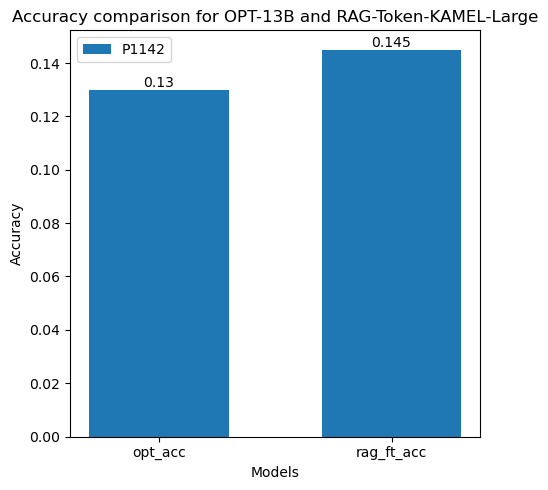

P277
{'opt_acc': 0.347, 'rag_ft_acc': 0.528}


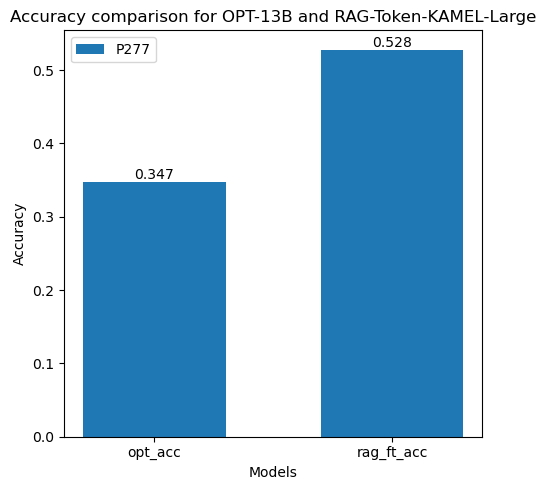

P1441
{'opt_acc': 0.219, 'rag_ft_acc': 0.128}


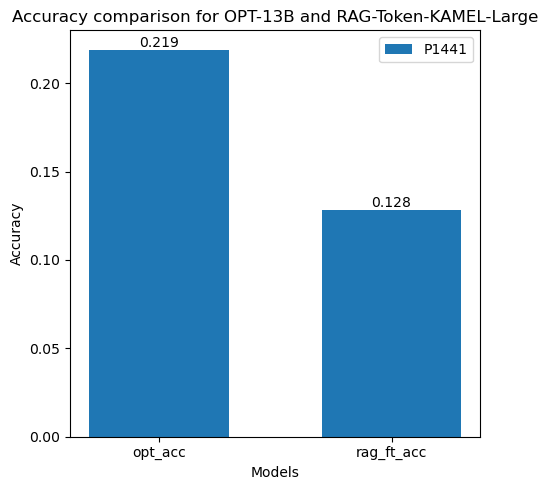

P170
{'opt_acc': 0.084, 'rag_ft_acc': 0.26}


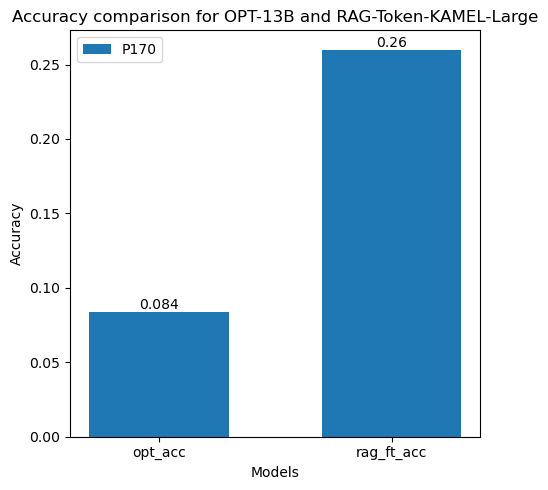

P115
{'opt_acc': 0.305, 'rag_ft_acc': 0.334}


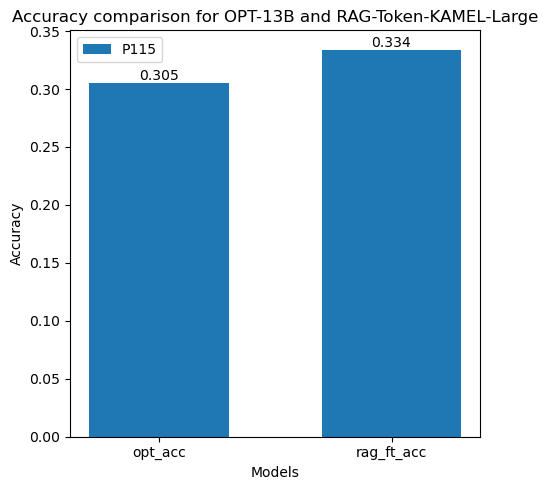

P541
{'opt_acc': 0.892, 'rag_ft_acc': 0.892}


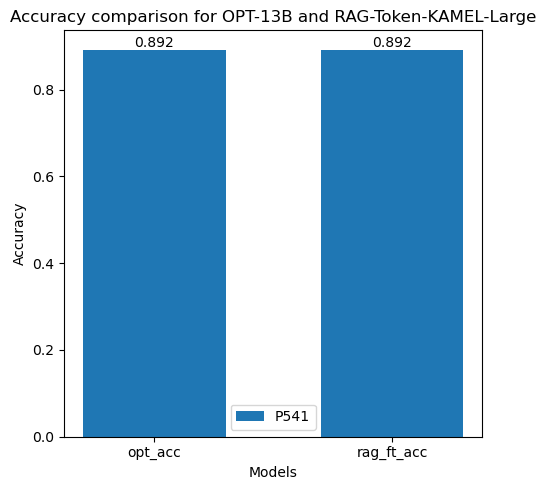

P103
{'opt_acc': 0.604, 'rag_ft_acc': 0.452}


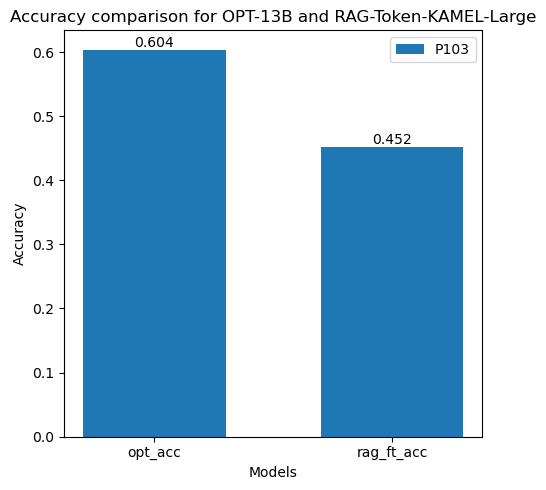

P105
{'opt_acc': 0.893, 'rag_ft_acc': 0.636}


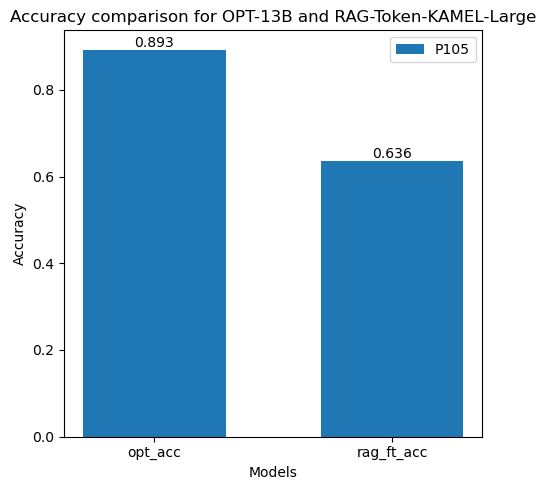

P4743
{'opt_acc': 0.894, 'rag_ft_acc': 0.915}


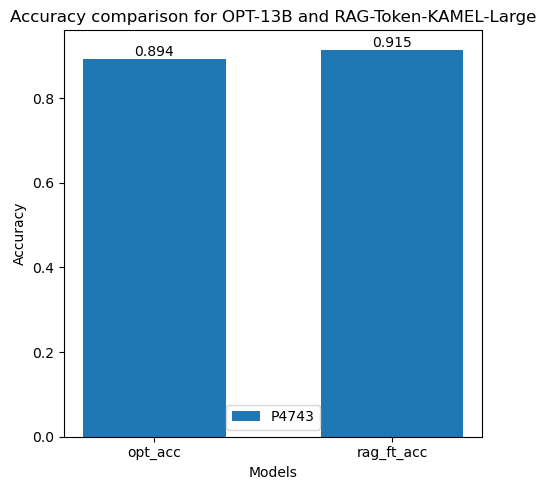

P1433
{'opt_acc': 0.133, 'rag_ft_acc': 0.186}


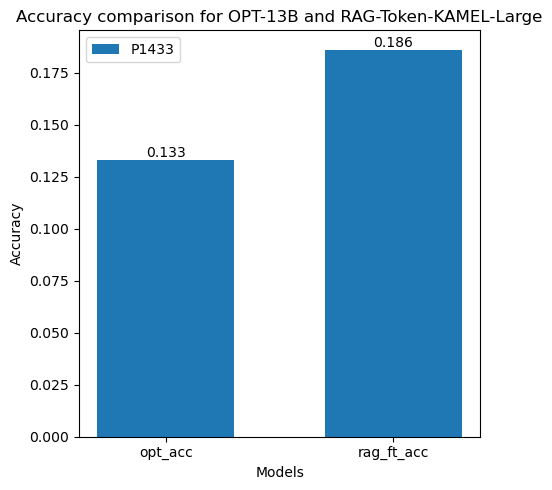

P30
{'opt_acc': 0.925, 'rag_ft_acc': 0.842}


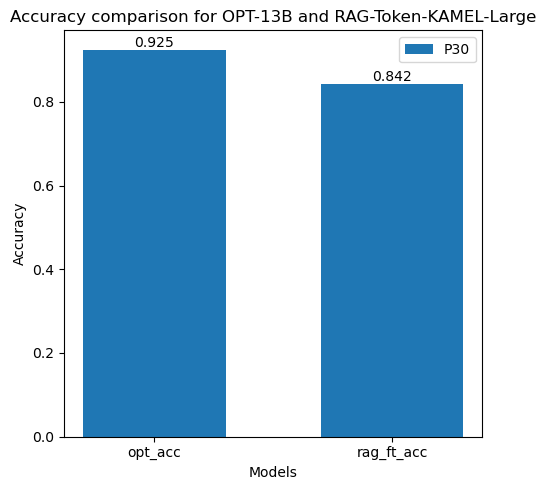

P97
{'opt_acc': 0.186, 'rag_ft_acc': 0.315}


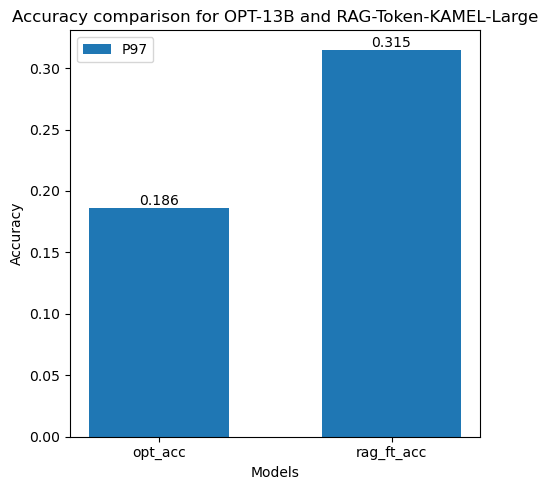

P4552
{'opt_acc': 0.115, 'rag_ft_acc': 0.167}


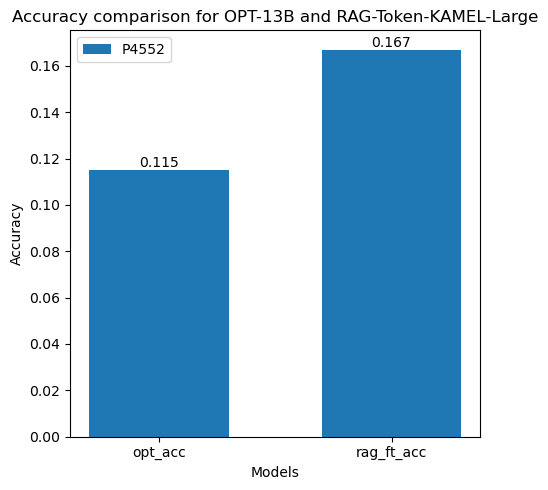

P400
{'opt_acc': 0.131, 'rag_ft_acc': 0.215}


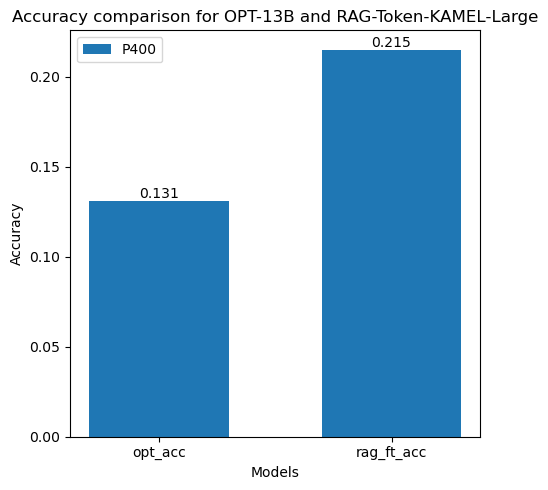

P407
{'opt_acc': 0.479, 'rag_ft_acc': 0.473}


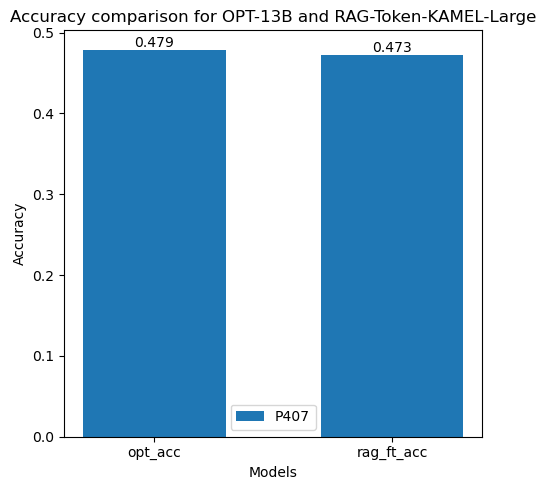

P127
{'opt_acc': 0.1, 'rag_ft_acc': 0.168}


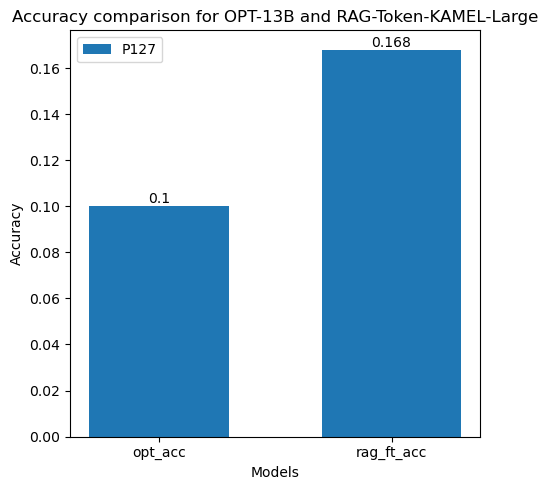

P8875
{'opt_acc': 0.913, 'rag_ft_acc': 0.93}


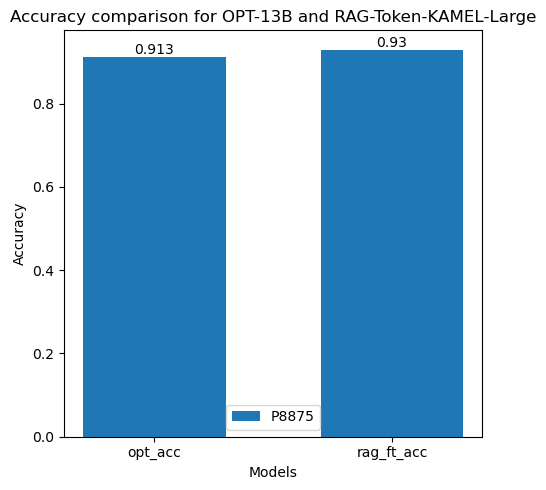

P4884
{'opt_acc': 0.77, 'rag_ft_acc': 0.8}


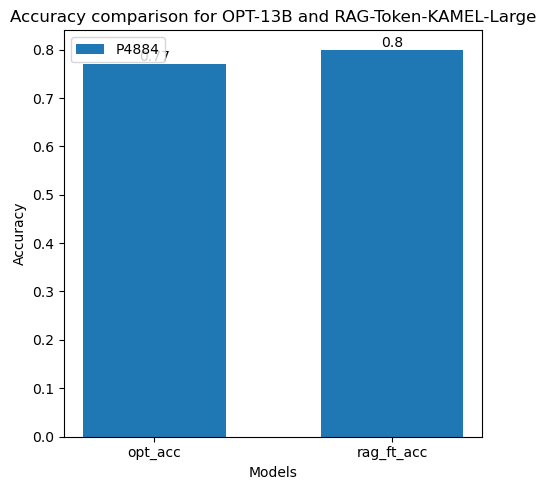

P371
{'opt_acc': 0.106, 'rag_ft_acc': 0.351}


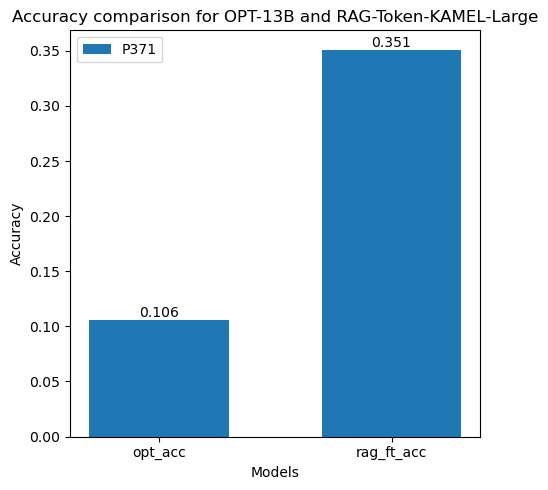

In [61]:
# compare plot for 20p  图多
import matplotlib.pyplot as plt

from collections import defaultdict
tree = lambda: defaultdict(tree)
prop_compare = tree()

for prop in results_all_opt.keys():#三选一随便一个，三个key相同
    #prop_compare[prop]['rag_acc'] = results_all_rag[prop]['acc']
    prop_compare[prop]['opt_acc'] = results_all_opt[prop]['acc']
    prop_compare[prop]['rag_ft_acc'] = results_all_ft[prop]['acc']

for prop_set in prop_compare.items():#('P196', {'rag_acc': 0.02, 'opt_acc': 0.76, 'rag_ft_acc': 0.8}))
    print(prop_set[0])
    print(dict(prop_set[1]))
   
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(5,5))

    # Plot the data as a continuous line
    barr = ax.bar(dict(prop_set[1]).keys(),dict(prop_set[1]).values(),width=0.6,label=prop_set[0])#log=True  width=0.3
    ax.bar_label(barr)
    # Add axis labels and a title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy comparison for OPT-13B and RAG-Token-KAMEL-Large')#RAG-Token-NQ, 

    # Rotate the x-axis labels by 45 degrees
    #plt.xticks(rotation=45)

    ax.set_xticks(range(len(dict(prop_set[1]).keys())))
    ax.set_xticklabels(dict(prop_set[1]).keys())

    # Add a legend and adjust the layout
    ax.legend()
    fig.tight_layout()

    # Display the plot
    plt.show()


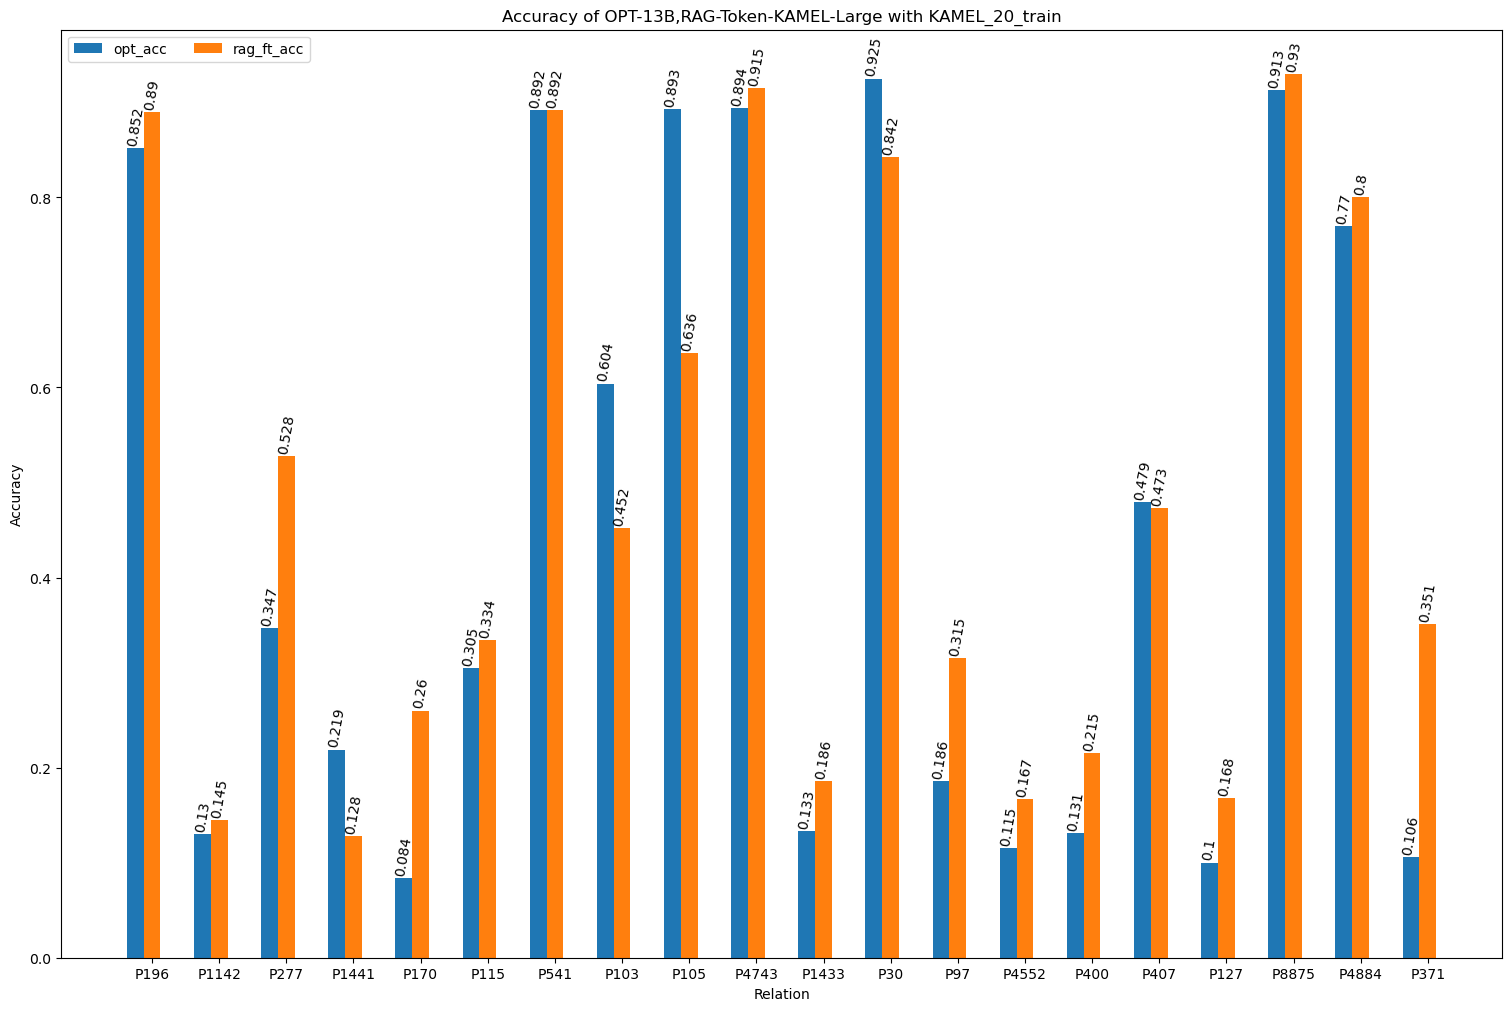

In [62]:
import matplotlib.pyplot as plt
import numpy as np

props = results_all_opt.keys()#三选一，随意

# rag_acc = []
# for prop in results_all_rag.values():
#     rag_acc.append(prop['acc'])

opt_acc = []
for prop in results_all_opt.values():
    opt_acc.append(prop['acc'])

ft_acc = []
for prop in results_all_ft.values():
    ft_acc.append(prop['acc'])

# ensemble_acc = []
# for prop in results_all_ensemble.values():
#     ensemble_acc.append(prop['acc'])

group_acc = {
    #'rag_acc': rag_acc,
    'opt_acc': opt_acc,
    'rag_ft_acc': ft_acc,
    #'ensemble_acc': ensemble_acc
}

x = np.arange(len(props))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,10),layout='constrained')#

for attribute, measurement in group_acc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1, rotation=80)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Relation')
ax.set_title('Accuracy of OPT-13B,RAG-Token-KAMEL-Large with KAMEL_20_train')


# Set the x-tick labels and rotate them by 90 degrees
#ax.set_xticks(x + width / 2)
#ax.set_xticklabels(props, rotation=90)


ax.set_xticks(x + width, props)
ax.legend(loc='upper left', ncols=3)# 
#ax.set_ylim(0, 250)

plt.show()

In [63]:
print(results_all_opt.keys())

dict_keys(['P196', 'P1142', 'P277', 'P1441', 'P170', 'P115', 'P541', 'P103', 'P105', 'P4743', 'P1433', 'P30', 'P97', 'P4552', 'P400', 'P407', 'P127', 'P8875', 'P4884', 'P371'])


In [64]:
print(results_all_opt.values())

dict_values([defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 210, 'acc': 0.852}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6112, 'acc': 0.13}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 8072, 'acc': 0.347}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 9601, 'acc': 0.219}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6744, 'acc': 0.084}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 6541, 'acc': 0.305}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 2317, 'acc': 0.892}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 11814, 'acc': 0.604}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 537, 'acc': 0.893}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 543, 'acc': 0.894}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 4314, 'acc': 0.133}), defaultdict(<function <lambda> at 0x7fe3d900eee0>, {'pop': 14314, 'acc': 0.925}), defaultdict(<func

新加一段slides用图：

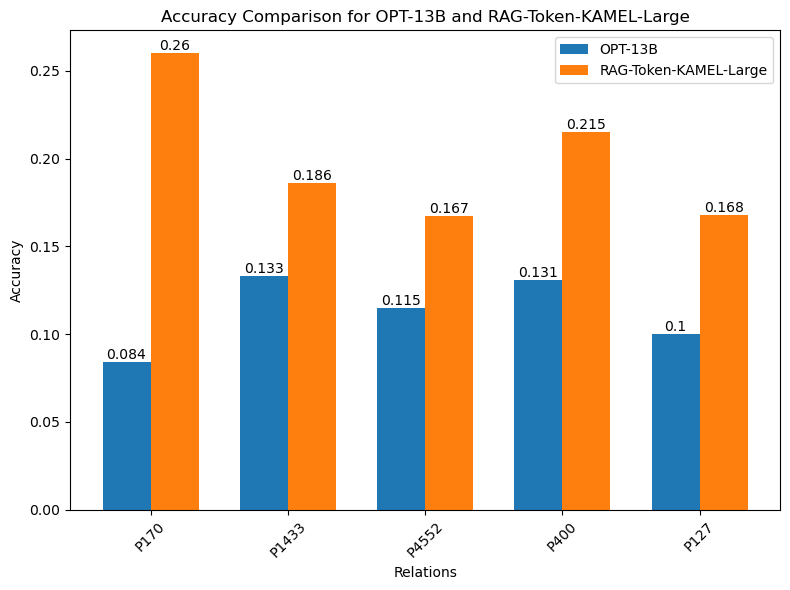

In [65]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict with nested defaultdicts
tree = lambda: defaultdict(tree)
prop_present = tree()

# List of poor properties
poor_props = ['P170', 'P1433', 'P4552', 'P400', 'P127']

# Iterate over the keys of `results_all_opt`
for prop in results_all_opt.keys():
    if prop in poor_props:
        # Store accuracy values for different models in the nested defaultdict
        prop_present[prop]['opt_acc'] = results_all_opt[prop]['acc']
        prop_present[prop]['rag_ft_acc'] = results_all_ft[prop]['acc']

# Extract keys and values from prop_present
keys = list(prop_present.keys())
opt_acc_values = [value['opt_acc'] for value in prop_present.values()]
rag_ft_acc_values = [value['rag_ft_acc'] for value in prop_present.values()]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as grouped bar graphs
bar_width = 0.35
index = range(len(keys))
barr1 = ax.bar(index, opt_acc_values, width=bar_width, label='OPT-13B')
barr2 = ax.bar([i + bar_width for i in index], rag_ft_acc_values, width=bar_width, label='RAG-Token-KAMEL-Large')

# Add labels to the bars
ax.bar_label(barr1)
ax.bar_label(barr2)

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for OPT-13B and RAG-Token-KAMEL-Large')

# Rotate the x-axis labels by 45 degrees
plt.xticks([i + bar_width/2 for i in index], keys, rotation=45)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()

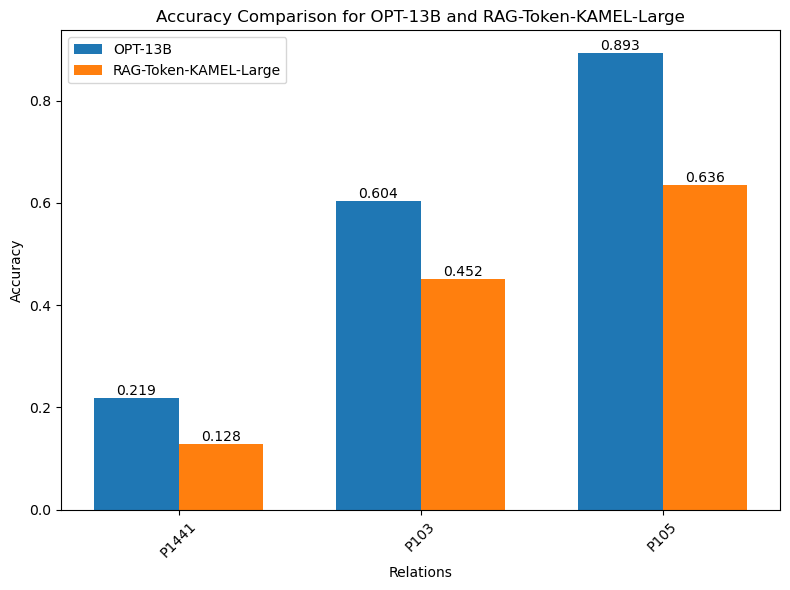

In [66]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict with nested defaultdicts
tree = lambda: defaultdict(tree)
prop_present = tree()

# List of poor properties
opt_adv_props = ['P103', 'P105', 'P1441']

# Iterate over the keys of `results_all_opt`
for prop in results_all_opt.keys():
    if prop in opt_adv_props:
        # Store accuracy values for different models in the nested defaultdict
        prop_present[prop]['opt_acc'] = results_all_opt[prop]['acc']
        prop_present[prop]['rag_ft_acc'] = results_all_ft[prop]['acc']

# Extract keys and values from prop_present
keys = list(prop_present.keys())
opt_acc_values = [value['opt_acc'] for value in prop_present.values()]
rag_ft_acc_values = [value['rag_ft_acc'] for value in prop_present.values()]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as grouped bar graphs
bar_width = 0.35
index = range(len(keys))
barr1 = ax.bar(index, opt_acc_values, width=bar_width, label='OPT-13B')
barr2 = ax.bar([i + bar_width for i in index], rag_ft_acc_values, width=bar_width, label='RAG-Token-KAMEL-Large')

# Add labels to the bars
ax.bar_label(barr1)
ax.bar_label(barr2)

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for OPT-13B and RAG-Token-KAMEL-Large')

# Rotate the x-axis labels by 45 degrees
plt.xticks([i + bar_width/2 for i in index], keys, rotation=45)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()

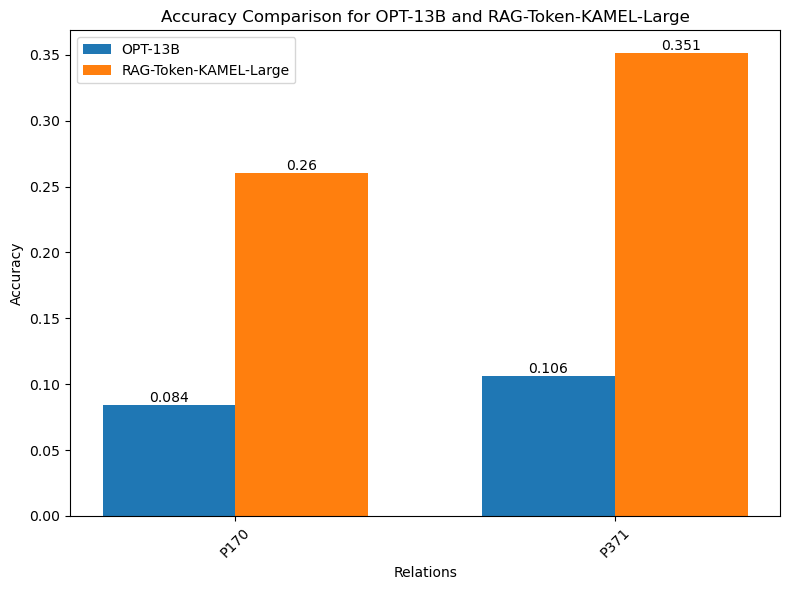

In [67]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict with nested defaultdicts
tree = lambda: defaultdict(tree)
prop_present = tree()

# List of poor properties
rag_adv_props = ['P371', 'P170']

# Iterate over the keys of `results_all_opt`
for prop in results_all_opt.keys():
    if prop in rag_adv_props:
        # Store accuracy values for different models in the nested defaultdict
        prop_present[prop]['opt_acc'] = results_all_opt[prop]['acc']
        prop_present[prop]['rag_ft_acc'] = results_all_ft[prop]['acc']

# Extract keys and values from prop_present
keys = list(prop_present.keys())
opt_acc_values = [value['opt_acc'] for value in prop_present.values()]
rag_ft_acc_values = [value['rag_ft_acc'] for value in prop_present.values()]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as grouped bar graphs
bar_width = 0.35
index = range(len(keys))
barr1 = ax.bar(index, opt_acc_values, width=bar_width, label='OPT-13B')
barr2 = ax.bar([i + bar_width for i in index], rag_ft_acc_values, width=bar_width, label='RAG-Token-KAMEL-Large')

# Add labels to the bars
ax.bar_label(barr1)
ax.bar_label(barr2)

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for OPT-13B and RAG-Token-KAMEL-Large')

# Rotate the x-axis labels by 45 degrees
plt.xticks([i + bar_width/2 for i in index], keys, rotation=45)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()

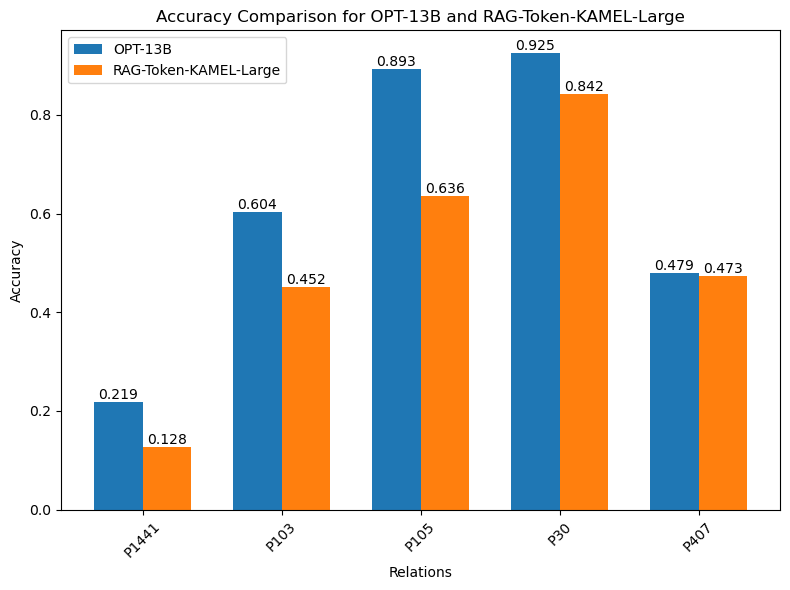

In [68]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict with nested defaultdicts
tree = lambda: defaultdict(tree)
prop_present = tree()

# List of poor properties
opt_list_props = ['P30', 'P103', 'P105', 'P407', 'P1441']

# Iterate over the keys of `results_all_opt`
for prop in results_all_opt.keys():
    if prop in opt_list_props:
        # Store accuracy values for different models in the nested defaultdict
        prop_present[prop]['opt_acc'] = results_all_opt[prop]['acc']
        prop_present[prop]['rag_ft_acc'] = results_all_ft[prop]['acc']

# Extract keys and values from prop_present
keys = list(prop_present.keys())
opt_acc_values = [value['opt_acc'] for value in prop_present.values()]
rag_ft_acc_values = [value['rag_ft_acc'] for value in prop_present.values()]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as grouped bar graphs
bar_width = 0.35
index = range(len(keys))
barr1 = ax.bar(index, opt_acc_values, width=bar_width, label='OPT-13B')
barr2 = ax.bar([i + bar_width for i in index], rag_ft_acc_values, width=bar_width, label='RAG-Token-KAMEL-Large')

# Add labels to the bars
ax.bar_label(barr1)
ax.bar_label(barr2)

# Add axis labels and a title
ax.set_xlabel('Relations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for OPT-13B and RAG-Token-KAMEL-Large')

# Rotate the x-axis labels by 45 degrees
plt.xticks([i + bar_width/2 for i in index], keys, rotation=45)

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()

Accuracy差异：

In [69]:
# prepare compare preds rag&opt&ft
#file_path_rag = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part2/for_compare_pop/rag/kamel_20_pop'
file_path_opt = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/10shot_opt_train/kamel_20_pop_full'#'/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part2/for_compare_pop/opt/kamel_20_pop'
file_path_ft = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/0shot_rag_token_ft_train/kamel_20_pop_full'#'/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part2/for_compare_pop/ft/kamel_20_pop'

from collections import defaultdict
tree = lambda: defaultdict(tree)
#pred_all_rag = tree()
pred_all_opt = tree()
pred_all_ft = tree()

# for subdirectory in os.listdir(file_path_rag):#P196
#     results_rag = []
#     if subdirectory.startswith('P'):
#         f = os.path.join(file_path_rag, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
#     else:
#         continue

#     # checking if it is a file
#     if os.path.isdir(f):
#         test = read_triples(os.path.join(f, 'predictions_facebookrag-token-nq_fewshot_0.jsonl'))
    
#     for item in test:
#         results_rag.append(item['prediction'])

#     pred_all_rag[subdirectory]=results_rag

for subdirectory in os.listdir(file_path_opt):#P196
    results_opt = []
    if subdirectory.startswith('P'):
        f = os.path.join(file_path_opt, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookopt-13b_fewshot_10.jsonl'))

    for item in test:
        results_opt.append(item['prediction'].replace('%',''))#..lower()

    pred_all_opt[subdirectory]=results_opt

for subdirectory in os.listdir(file_path_ft):#P196
    results_ft = []
    if subdirectory.startswith('P'):
        f = os.path.join(file_path_ft, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookrag-token-base-ft_fewshot_0.jsonl'))
    
    for item in test:
        results_ft.append(item['prediction'])

    pred_all_ft[subdirectory]=results_ft

#pred_all_rag = dict(pred_all_rag)
pred_all_opt = dict(pred_all_opt)
pred_all_ft = dict(pred_all_ft)

#print(pred_all_rag)
print(pred_all_opt)
print(pred_all_ft)
#print(len(pred_all_rag))
print(len(pred_all_opt))
print(len(pred_all_ft))

{'P196': ['asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'Mars-crossing minor planet; asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid belt', 'asteroid 

In [70]:
# # compare pred rag&opt 目前用不到先别删！！！目前用不到先别删！！！目前用不到先别删！！！
# from collections import defaultdict
# tree = lambda: defaultdict(tree)
# pred_diff_rag_opt = tree()

# for prop in pred_all_rag:#P196
#     flag=0
#     pred_rag = pred_all_rag.get(prop)
#     pred_opt = pred_all_opt.get(prop)
#     for n in range(len(pred_rag)):
#         if pred_rag[n] == pred_opt[n]:
#             flag += 1
#     same = flag
#     diff = len(pred_rag) - flag
#     pred_diff_rag_opt[prop]['same']=same
#     pred_diff_rag_opt[prop]['diff']=diff

# pred_diff_rag_opt = dict(pred_diff_rag_opt)
# print(pred_diff_rag_opt)

In [71]:
# #目前用不到先别删！！！目前用不到先别删！！！目前用不到先别删！！！
# import matplotlib.pyplot as plt
# import numpy as np

# props = pred_diff_rag_opt.keys()

# diff_rag_opt = []
# for prop in pred_diff_rag_opt.values():
#     diff_rag_opt.append(prop['diff'])

# same_rag_opt = []
# for prop in pred_diff_rag_opt.values():
#     same_rag_opt.append(prop['same'])

# group_acc = {
#     'Same': same_rag_opt,
#     'Difference': diff_rag_opt,
# }

# x = np.arange(len(props))  # the label locations
# width = 0.25  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(figsize=(10,10),layout='constrained')#

# for attribute, measurement in group_acc.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=1)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of predictions')
# ax.set_xlabel('Property')
# ax.set_title('Prediction of RAG-Token-NQ and OPT-13B with KAMEL_20')
# ax.set_xticks(x + width, props)
# ax.legend(ncols=3)#loc='upper left', 
# #ax.set_ylim(0, 250)

# plt.show()

In [72]:
# compare pred ft&opt
from collections import defaultdict
tree = lambda: defaultdict(tree)
pred_diff_ft_opt = tree()

for prop in pred_all_opt:#P196
    flag=0
    pred_ft = pred_all_ft.get(prop)
    pred_opt = pred_all_opt.get(prop)
    for n in range(len(pred_opt)):
        if pred_ft[n] == pred_opt[n]:
            flag += 1
    same = flag
    diff = len(pred_ft) - flag
    pred_diff_ft_opt[prop]['same']=same
    pred_diff_ft_opt[prop]['diff']=diff

pred_diff_ft_opt = dict(pred_diff_ft_opt)
print(pred_diff_ft_opt)

{'P196': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 954, 'diff': 46}), 'P1142': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 93, 'diff': 907}), 'P277': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 342, 'diff': 658}), 'P1441': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 58, 'diff': 942}), 'P170': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 47, 'diff': 953}), 'P115': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 238, 'diff': 762}), 'P541': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 860, 'diff': 140}), 'P103': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 505, 'diff': 495}), 'P105': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 638, 'diff': 362}), 'P4743': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 975, 'diff': 25}), 'P1433': defaultdict(<function <lambda> at 0x7fe3eba2baf0>, {'same': 31, 'diff': 969}), 'P30': defaultdict(<function <lam

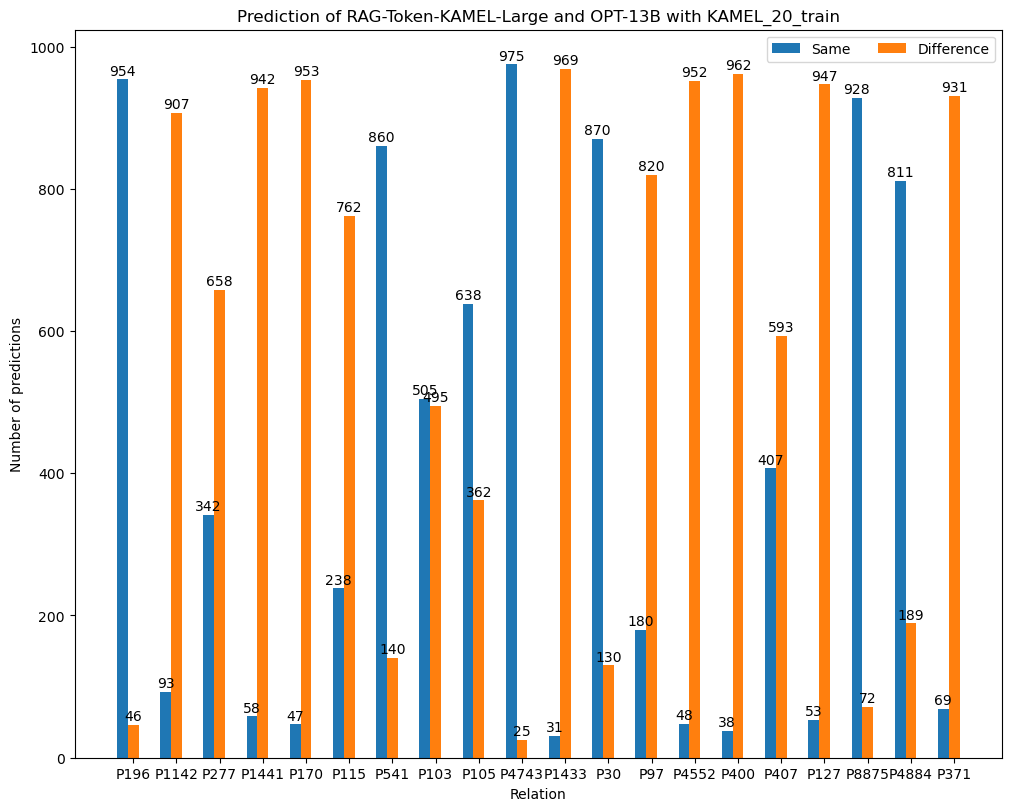

In [73]:
import matplotlib.pyplot as plt
import numpy as np

props = pred_diff_ft_opt.keys()

diff_ft_opt = []
for prop in pred_diff_ft_opt.values():
    diff_ft_opt.append(prop['diff'])

same_ft_opt = []
for prop in pred_diff_ft_opt.values():
    same_ft_opt.append(prop['same'])

group_acc = {
    'Same': same_ft_opt,
    'Difference': diff_ft_opt,
}

x = np.arange(len(props))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,8),layout='constrained')#

for attribute, measurement in group_acc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of predictions')
ax.set_xlabel('Relation')
ax.set_title('Prediction of RAG-Token-KAMEL-Large and OPT-13B with KAMEL_20_train')
ax.set_xticks(x + width, props)
ax.legend(ncols=3)#loc='upper left', 
#ax.set_ylim(0, 250)

plt.show()

In [74]:
# # compare pred rag&ft 目前用不到先别删！！！目前用不到先别删！！！目前用不到先别删！！！
# from collections import defaultdict
# tree = lambda: defaultdict(tree)
# pred_diff_rag_ft = tree()

# for prop in pred_all_ft:#P196
#     flag=0
#     pred_rag = pred_all_rag.get(prop)
#     pred_ft = pred_all_ft.get(prop)
#     for n in range(len(pred_rag)):
#         if pred_rag[n] == pred_ft[n]:
#             flag += 1
#     same = flag
#     diff = len(pred_rag) - flag
#     pred_diff_rag_ft[prop]['same']=same
#     pred_diff_rag_ft[prop]['diff']=diff

# pred_diff_rag_ft = dict(pred_diff_rag_ft)
# print(pred_diff_rag_ft)

In [75]:
# #目前用不到先别删！！！目前用不到先别删！！！目前用不到先别删！！！
# import matplotlib.pyplot as plt
# import numpy as np

# props = pred_diff_rag_ft.keys()

# diff_rag_ft = []
# for prop in pred_diff_rag_ft.values():
#     diff_rag_ft.append(prop['diff'])

# same_rag_ft = []
# for prop in pred_diff_rag_ft.values():
#     same_rag_ft.append(prop['same'])

# group_acc = {
#     'Same': same_rag_ft,
#     'Difference': diff_rag_ft,
# }

# x = np.arange(len(props))  # the label locations
# width = 0.25  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(figsize=(10,10),layout='constrained')#

# for attribute, measurement in group_acc.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=1)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of predictions')
# ax.set_xlabel('Property')
# ax.set_title('Prediction of RAG-Token-NQ and RAG-Token-KAMEL-Large with KAMEL_20')
# ax.set_xticks(x + width, props)
# ax.legend(ncols=3)#loc='upper left', 
# #ax.set_ylim(0, 250)

# plt.show()

Popularity分析：

In [76]:
# # merge all pop to find the threshold -rag 目前用不到，先别删！目前用不到，先别删！目前用不到，先别删！
# path_rag_train = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/0shot_rag_token_nq_train/kamel_20_pop_full'

# from collections import defaultdict
# tree = lambda: defaultdict(tree)
# rag_pop = tree()

# for subdirectory in os.listdir(path_rag_train):#P196
#     if subdirectory.startswith('P'):
#         f = os.path.join(path_rag_train, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
#     else:
#         continue

#     # checking if it is a file
#     if os.path.isdir(f):
#         test = read_triples(os.path.join(f, 'predictions_facebookrag-token-nq_fewshot_0.jsonl'))
    
#     for item in test:
#         if item['sub_pop'] == 0:
#             continue
#         if item['prediction'].lower() == item['obj_label'][0].lower():#[0]['chosen']
#             #print(item['sub_pop'])
#             rag_pop[item['sub_pop']] = rag_pop.get(item['sub_pop'],0)+1
# print(rag_pop)

In [77]:
# merge all pop to find the threshold -opt
path_opt_train = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/10shot_opt_train/kamel_20_pop_full'

from collections import defaultdict
tree = lambda: defaultdict(tree)
opt_pop = tree()

for subdirectory in os.listdir(path_opt_train):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(path_opt_train, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookopt-13b_fewshot_10.jsonl'))
    
    for item in test:
        if item['sub_pop'] == 0:
            continue
        if item['prediction'].replace('%','').lower() == item['obj_label'][0].lower():#[0]['chosen']
            #print(item['sub_pop'])
            opt_pop[item['sub_pop']] = opt_pop.get(item['sub_pop'],0)+1
print(opt_pop)

defaultdict(<function <lambda> at 0x7fe3d4f46700>, {73: 55, 89: 33, 156: 9, 80: 24, 72: 44, 60: 35, 56: 69, 65: 61, 58: 52, 68: 52, 113: 23, 63: 46, 76: 44, 801: 1, 50: 41, 138: 16, 51: 59, 81: 36, 122: 29, 74: 41, 61: 40, 66: 67, 96: 24, 125: 19, 83: 38, 64: 56, 79: 39, 55: 58, 70: 34, 335: 7, 43: 55, 423: 8, 48: 55, 44: 47, 119: 22, 102: 26, 62: 57, 57: 79, 71: 54, 239: 7, 46: 50, 87: 24, 54: 66, 59: 61, 42: 52, 217: 5, 75: 48, 455: 5, 93: 23, 99: 32, 67: 53, 896: 1, 505: 4, 47: 41, 98: 29, 278: 6, 110: 25, 84: 24, 137: 24, 3661: 1, 69: 35, 49: 54, 134: 25, 191: 9, 88: 25, 225: 11, 91: 31, 45: 36, 52: 52, 86: 35, 158: 12, 77: 43, 252: 7, 53: 62, 247: 8, 107: 8, 173: 14, 563: 4, 130: 25, 330: 9, 78: 43, 112: 29, 118: 20, 271: 7, 352: 4, 235: 11, 167: 15, 133: 25, 181: 18, 536: 2, 116: 24, 315: 5, 176: 10, 171: 11, 474: 5, 1315: 2, 106: 28, 92: 26, 288: 6, 169: 10, 123: 18, 109: 15, 36: 30, 41: 47, 85: 30, 356: 11, 82: 38, 108: 19, 131: 15, 238: 6, 94: 32, 101: 20, 37: 43, 140: 21, 227

In [78]:
# merge all pop to find the threshold -ft
path_ft_train = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/0shot_rag_token_ft_train/kamel_20_pop_full'

from collections import defaultdict
tree = lambda: defaultdict(tree)
ft_pop = tree()

for subdirectory in os.listdir(path_ft_train):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(path_ft_train, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookrag-token-base-ft_fewshot_0.jsonl'))
    
    for item in test:
        if item['sub_pop'] == 0:
            continue
        if item['prediction'].lower() == item['obj_label'][0].lower():#[0]['chosen']
            #print(item['sub_pop'])
            ft_pop[item['sub_pop']] = ft_pop.get(item['sub_pop'],0)+1
print(ft_pop)

defaultdict(<function <lambda> at 0x7fe3d4de81f0>, {73: 58, 89: 34, 156: 13, 80: 27, 72: 51, 60: 33, 56: 63, 65: 61, 58: 52, 68: 50, 113: 23, 63: 44, 76: 46, 801: 3, 50: 37, 138: 18, 51: 57, 81: 37, 122: 31, 74: 47, 61: 42, 66: 69, 69: 39, 96: 27, 125: 24, 64: 55, 83: 39, 79: 40, 55: 55, 70: 35, 335: 9, 43: 49, 423: 10, 48: 46, 44: 43, 119: 27, 102: 24, 62: 59, 57: 75, 95: 29, 71: 52, 239: 7, 46: 48, 87: 23, 54: 60, 59: 59, 42: 50, 217: 8, 75: 48, 455: 5, 93: 26, 99: 31, 67: 52, 896: 1, 505: 6, 47: 38, 98: 33, 278: 6, 110: 21, 84: 24, 137: 25, 3661: 1, 49: 45, 134: 26, 191: 15, 88: 25, 225: 7, 91: 30, 45: 31, 52: 46, 86: 39, 158: 14, 77: 39, 252: 9, 53: 56, 247: 9, 107: 10, 173: 20, 563: 4, 130: 28, 330: 8, 78: 47, 112: 31, 118: 22, 271: 8, 352: 5, 235: 14, 167: 18, 133: 26, 90: 26, 181: 18, 536: 2, 116: 25, 176: 12, 315: 4, 103: 32, 171: 12, 474: 5, 1315: 2, 106: 32, 92: 28, 288: 7, 169: 12, 123: 20, 109: 16, 36: 29, 41: 39, 244: 11, 85: 31, 356: 8, 82: 35, 114: 19, 108: 21, 131: 16, 

In [79]:
#print(rag_pop)
print(opt_pop)
print(ft_pop)
#print(len(rag_pop))
print(len(opt_pop))
print(len(ft_pop))

defaultdict(<function <lambda> at 0x7fe3d4f46700>, {73: 55, 89: 33, 156: 9, 80: 24, 72: 44, 60: 35, 56: 69, 65: 61, 58: 52, 68: 52, 113: 23, 63: 46, 76: 44, 801: 1, 50: 41, 138: 16, 51: 59, 81: 36, 122: 29, 74: 41, 61: 40, 66: 67, 96: 24, 125: 19, 83: 38, 64: 56, 79: 39, 55: 58, 70: 34, 335: 7, 43: 55, 423: 8, 48: 55, 44: 47, 119: 22, 102: 26, 62: 57, 57: 79, 71: 54, 239: 7, 46: 50, 87: 24, 54: 66, 59: 61, 42: 52, 217: 5, 75: 48, 455: 5, 93: 23, 99: 32, 67: 53, 896: 1, 505: 4, 47: 41, 98: 29, 278: 6, 110: 25, 84: 24, 137: 24, 3661: 1, 69: 35, 49: 54, 134: 25, 191: 9, 88: 25, 225: 11, 91: 31, 45: 36, 52: 52, 86: 35, 158: 12, 77: 43, 252: 7, 53: 62, 247: 8, 107: 8, 173: 14, 563: 4, 130: 25, 330: 9, 78: 43, 112: 29, 118: 20, 271: 7, 352: 4, 235: 11, 167: 15, 133: 25, 181: 18, 536: 2, 116: 24, 315: 5, 176: 10, 171: 11, 474: 5, 1315: 2, 106: 28, 92: 26, 288: 6, 169: 10, 123: 18, 109: 15, 36: 30, 41: 47, 85: 30, 356: 11, 82: 38, 108: 19, 131: 15, 238: 6, 94: 32, 101: 20, 37: 43, 140: 21, 227

In [80]:
# #目前没用，先别删！目前没用，先别删！目前没用，先别删！目前没用，先别删！

# import matplotlib.pyplot as plt

# # Extract keys and values from datasets
# popularity1, counts1 = zip(*rag_pop.items())
# popularity2, counts2 = zip(*opt_pop.items())
# popularity3, counts3 = zip(*ft_pop.items())

# # Create scatter plot
# #plt.scatter(popularity1, counts1, color='blue', label='rag', alpha=0.3)
# plt.scatter(popularity2, counts2, color='orange', label='opt', alpha=0.3)
# plt.scatter(popularity3, counts3, color='green', label='rag_ft', alpha=0.3)
# plt.axvline(max(ft_pop.keys()), color='r', linestyle='--', label='Threshold')
# plt.xlabel('Popularity')
# plt.ylabel('Counts of correct predictions')
# plt.title('Overivew of correct predictions of OPT-13B and RAG models on KAMEL_20')
# plt.legend()

# # Show plot
# plt.show()


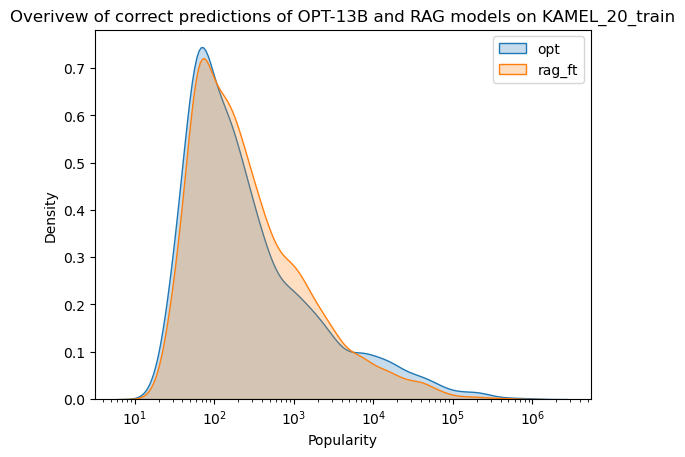

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


#path_rag_train = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/0shot_rag_token_nq_train/kamel_20_pop_full'
path_opt_train = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/10shot_opt_train/kamel_20_pop_full'
path_ft_train = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part3/pred_pop_kamel_20_train/0shot_rag_token_ft_train/kamel_20_pop_full'

rag_results = []
opt_results = []
ft_results = []

# for subdirectory in os.listdir(path_rag_train):#P196
#     if subdirectory.startswith('P'):
#         f = os.path.join(path_rag_train, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
#     else:
#         continue

#     # checking if it is a file
#     if os.path.isdir(f):
#         test = read_triples(os.path.join(f, 'predictions_facebookrag-token-nq_fewshot_0.jsonl'))
    
#     for item in test:
#         if item['sub_pop'] == 0:
#             continue
#         if item['prediction'].lower() == item['obj_label'][0].lower():#[0]['chosen']
#             rag_results.append(item['sub_pop'])

for subdirectory in os.listdir(path_opt_train):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(path_opt_train, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookopt-13b_fewshot_10.jsonl'))
    
    for item in test:
        if item['sub_pop'] == 0:
            continue
        if item['prediction'].replace('%','').lower() == item['obj_label'][0].lower():#[0]['chosen']
            opt_results.append(item['sub_pop'])

for subdirectory in os.listdir(path_ft_train):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(path_ft_train, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookrag-token-base-ft_fewshot_0.jsonl'))
    
    for item in test:
        if item['sub_pop'] == 0:
            continue
        if item['prediction'].lower() == item['obj_label'][0].lower():#[0]['chosen']
            ft_results.append(item['sub_pop'])


#dataset1_values = list(rag_results)
dataset2_values = list(opt_results)
dataset3_values = list(ft_results)

#sns.kdeplot(dataset1_values, fill='shade', log_scale=True, label='rag')
sns.kdeplot(dataset2_values, fill='shade', log_scale=True, label='opt')#
sns.kdeplot(dataset3_values, fill='shade', log_scale=True, label='rag_ft')#

plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Overivew of correct predictions of OPT-13B and RAG models on KAMEL_20_train')
plt.legend()
plt.show()


In [82]:
print(dataset2_values)
print(dataset3_values)
print(len(dataset2_values))
print(len(dataset3_values))

[73, 89, 156, 80, 72, 60, 56, 65, 58, 68, 113, 63, 76, 801, 50, 138, 51, 81, 122, 74, 61, 66, 96, 125, 83, 64, 79, 55, 70, 335, 43, 63, 51, 423, 48, 44, 119, 102, 62, 57, 58, 65, 57, 57, 122, 71, 68, 239, 46, 61, 87, 54, 61, 59, 70, 54, 42, 217, 74, 55, 70, 75, 79, 455, 93, 59, 75, 99, 60, 67, 61, 63, 896, 68, 63, 65, 59, 70, 54, 57, 60, 74, 72, 505, 47, 76, 98, 63, 58, 278, 110, 73, 46, 55, 84, 58, 54, 137, 72, 87, 3661, 69, 56, 57, 49, 54, 134, 93, 62, 48, 51, 48, 67, 191, 88, 225, 75, 67, 56, 68, 69, 91, 45, 74, 67, 54, 66, 52, 86, 158, 42, 72, 57, 77, 55, 62, 252, 66, 53, 247, 49, 84, 91, 107, 86, 173, 66, 63, 77, 87, 191, 563, 52, 130, 330, 49, 62, 66, 56, 64, 77, 78, 59, 65, 66, 112, 75, 102, 91, 44, 118, 271, 53, 57, 352, 96, 87, 235, 78, 167, 78, 62, 66, 60, 83, 63, 133, 56, 78, 73, 86, 91, 51, 44, 65, 60, 77, 81, 54, 88, 89, 134, 54, 51, 48, 67, 79, 64, 181, 536, 48, 116, 59, 315, 176, 67, 171, 67, 67, 74, 68, 60, 56, 77, 50, 474, 68, 53, 43, 54, 61, 59, 1315, 58, 106, 92, 65,

14-644291
4535-1129195

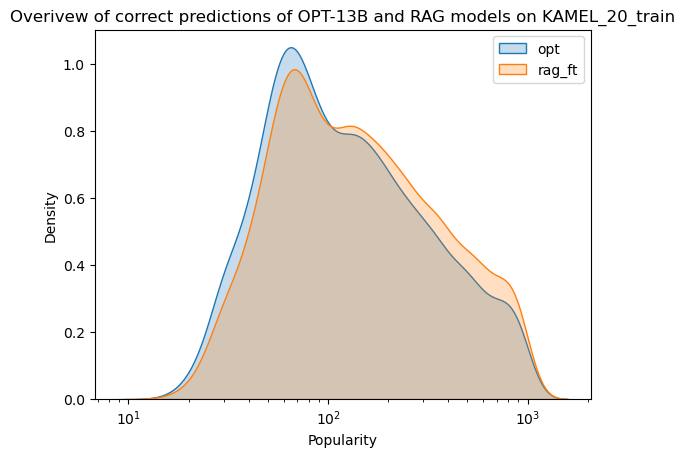

In [83]:
#指定pop范围内比较

#sns.kdeplot([x for x in dataset1_values if x > 100 and x < 200], fill='shade', label='rag')
sns.kdeplot([x for x in dataset2_values if x > 0 and x < 1000], log_scale=True, fill='shade', label='opt')
sns.kdeplot([x for x in dataset3_values if x > 0 and x < 1000], log_scale=True, fill='shade', label='rag_ft')

plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Overivew of correct predictions of OPT-13B and RAG models on KAMEL_20_train')# when popularity below 1000
plt.legend()
plt.show()

In [84]:
# find the optimal pop range for rag_ft

from scipy.stats import gaussian_kde

opt_small = [x for x in dataset2_values if x > 0 and x < 1000]
rag_ft_small = [x for x in dataset3_values if x > 0 and x < 1000]

min_val = min(min(opt_small), min(rag_ft_small))
max_val = max(max(opt_small), max(rag_ft_small))
# Evaluate the densities at a grid of points
x = np.linspace(min_val, max_val, 1000)#1000   #1129195
density1 = gaussian_kde(opt_small)(x)
density2 = gaussian_kde(rag_ft_small)(x)

# Find the points where the density of one list is greater than the other list
indices1 = np.where(density2 < density1)[0]
indices2 = np.where(density1 < density2)[0]

# Get the corresponding values
values1 = x[indices1]
values2 = x[indices2]

union_pop = list(set(values1)&set(values2))
pop_range_opt = list(set(values1)-set(union_pop))
pop_range_rag_ft = list(set(values2)-set(union_pop))

In [85]:
print(max(pop_range_opt))
print(min(pop_range_opt))
print(max(pop_range_rag_ft))
print(min(pop_range_rag_ft))
#pop大于644291用opt，其余用rag_ft的方法，和整体rag_ft结果一样
#仅查看0-100 pop,14-122用opt，其余rag_ft，keyi!

122.45845845845845
14.0
999.0
123.44444444444444


In [86]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# d1 = sns.kdeplot(dataset2_values)
# d2 = sns.kdeplot(dataset3_values)

# #这个别删这个别删这个别删这个别删
# line1 = d1.lines[0]
# x1, y1 = line1.get_data()

# line2 = d2.lines[0]
# x2, y2 = line2.get_data()

In [87]:
# For i in range(1,1000):
#    For y in range(1,1000):
#        evaluate_ensemble(I,y, kamel_20_train) //gives you the F1 score

Class分析：

In [88]:
# check kamel_20_train class status
file_path_20_class = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part5/analysis_train_class/opt/kamel_20_pop_class'

# results_all_20_class = {}

# for subdirectory in os.listdir(file_path_20_class):
#     results = []
#     if subdirectory.startswith('P'):
#         f = os.path.join(file_path_20_class, subdirectory)
#     else:
#         continue

#     # checking if it is a file
#     if os.path.isdir(f):
#         test = read_triples(os.path.join(f, 'train.jsonl'))

#     for item in test:
#         results.append(item['entity_class'])
#     results_all_20_class[subdirectory] = results#{'P136': [635, 3502],..}

# results_20_mean = {}#{'P136': 3622, 'P1376': 6337}
# for k,v in results_all_20.items():
#     results_20_mean[k]= int(np.mean(v))

from collections import defaultdict
tree = lambda: defaultdict(tree)
opt_results_all_class = tree()

for subdirectory in os.listdir(file_path_20_class):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(file_path_20_class, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'train.jsonl'))
    
    for item in test:
        if item['class'] == 'NULL':
            continue
        else:
            opt_results_all_class[item['class']] = opt_results_all_class.get(item['class'],0)+1

sorted_opt_results_all_class = dict(sorted(opt_results_all_class.items(),key=lambda x:x[1],reverse=True))

opt_class_name = list(sorted_opt_results_all_class.keys())#1406
opt_class_count= list(sorted_opt_results_all_class.values())

In [89]:
print(sorted_opt_results_all_class)

{'Q5': 2045, 'Q3863': 985, 'Q726': 958, 'Q16521': 903, 'Q7889': 893, 'Q8502': 887, 'Q5633421': 600, 'Q5398426': 566, 'Q2334719': 549, 'Q7278': 538, 'Q7725634': 480, 'Q15773317': 379, 'Q341': 358, 'Q19692072': 339, 'Q476028': 315, 'Q3305213': 298, 'Q737498': 271, 'Q26895936': 268, 'Q15416': 256, 'Q15261477': 229, 'Q4504495': 225, 'Q21198342': 200, 'Q14350': 193, 'Q3658341': 180, 'Q35666': 162, 'Q1002697': 160, 'Q87167': 149, 'Q11032': 126, 'Q7397': 121, 'Q19930933': 109, 'Q46831': 107, 'Q4830453': 104, 'Q47461344': 95, 'Q1539532': 93, 'Q41298': 84, 'Q105543609': 84, 'Q41710': 83, 'Q55488': 83, 'Q23038290': 82, 'Q15711870': 81, 'Q23442': 76, 'Q13393265': 74, 'Q15632617': 59, 'Q34763': 58, 'Q166142': 57, 'Q26894053': 57, 'Q860861': 54, 'Q482994': 54, 'Q39594': 47, 'Q133056': 45, 'Q54050': 45, 'Q15773347': 43, 'Q740445': 43, 'Q1110794': 41, 'Q40231': 38, 'Q1128324': 37, 'Q134556': 35, 'Q43229': 34, 'Q95074': 33, 'Q1114461': 33, 'Q188860': 32, 'Q1555508': 32, 'Q24634210': 32, 'Q35127': 29, 

In [90]:
#生成附录class列表，数值是每个class出现数

import pandas as pd
import matplotlib.pyplot as plt

# data from the plot
# property = ['Property A', 'Property B', 'Property C', 'Property D', 'Property E']
# mean_pop = [8.7, 7.9, 6.3, 5.6, 3.2]

# create a pandas DataFrame with the data
df = pd.DataFrame({'Entity Class': opt_class_name, 'Count': opt_class_count})

# print the DataFrame
print(df)

# # save the table as LaTeX
# with open('Count values of Entity Class_173.tex', 'w') as f:# 只取了前173个，计数大于等于10的class
#     f.write(df.head(173).to_latex(index=False))

     Entity Class  Count
0              Q5   2045
1           Q3863    985
2            Q726    958
3          Q16521    903
4           Q7889    893
...           ...    ...
1401         Q289      1
1402    Q41582469      1
1403    Q98216781      1
1404     Q7247847      1
1405     Q1407245      1

[1406 rows x 2 columns]


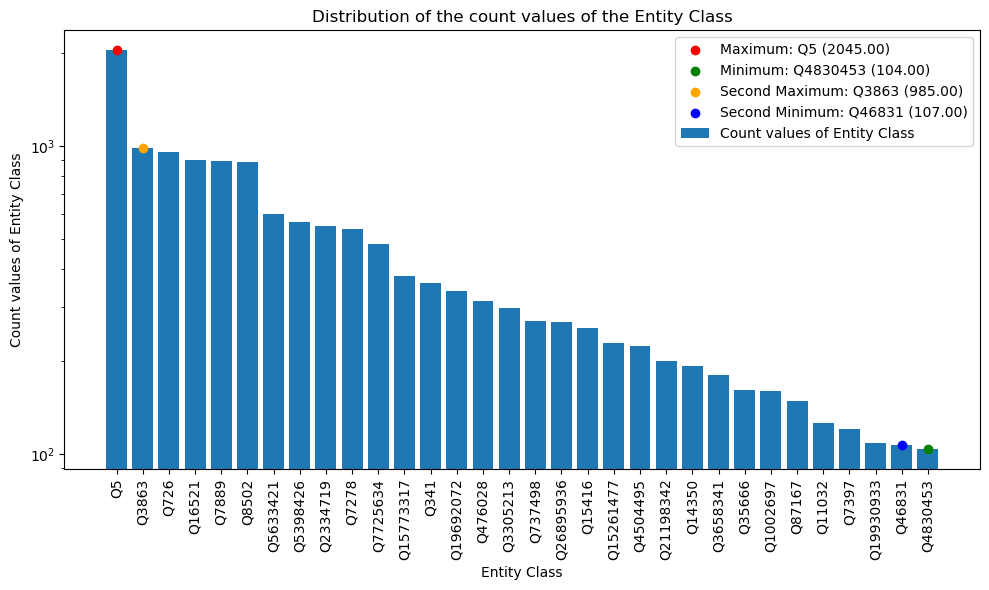

In [91]:
#kamel_20_train class status check
import matplotlib.pyplot as plt

# Get the index of the maximum and minimum values
max_index_class_20 = opt_class_count[:32].index(max(opt_class_count[:32]))
min_index_class_20 = opt_class_count[:32].index(min(opt_class_count[:32]))

# Get the index of the second maximum and minimum values
sorted_opt_class_count = sorted(opt_class_count,reverse=True)[:32]
second_max_index_class_20 = opt_class_count[:32].index(sorted_opt_class_count[1])
second_min_index_class_20 = opt_class_count[:32].index(sorted_opt_class_count[-2])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data as a continuous line
ax.bar(opt_class_name[:32],sorted_opt_class_count[:32],width=0.8,log=True,label='Count values of Entity Class')#plot(sorted_mean_pop_20, label='Mean values of popularities'),log=True

# Mark the maximum and minimum points with red and green dots respectively
ax.scatter(max_index_class_20, opt_class_count[max_index_class_20], color='red', label=f'Maximum: {opt_class_name[max_index_class_20]} ({opt_class_count[max_index_class_20]:.2f})')
ax.scatter(min_index_class_20, opt_class_count[min_index_class_20], color='green', label=f'Minimum: {opt_class_name[min_index_class_20]} ({opt_class_count[min_index_class_20]:.2f})')

# Mark the second maximum and minimum points with orange and blue dots respectively
ax.scatter(second_max_index_class_20, opt_class_count[second_max_index_class_20], color='orange', label=f'Second Maximum: {opt_class_name[second_max_index_class_20]} ({opt_class_count[second_max_index_class_20]:.2f})')
ax.scatter(second_min_index_class_20, opt_class_count[second_min_index_class_20], color='blue', label=f'Second Minimum: {opt_class_name[second_min_index_class_20]} ({opt_class_count[second_min_index_class_20]:.2f})')

# Add axis labels and a title
ax.set_xlabel('Entity Class')
ax.set_ylabel('Count values of Entity Class')
ax.set_title('Distribution of the count values of the Entity Class')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

ax.set_xticks(range(len(opt_class_name[:32])))
ax.set_xticklabels(opt_class_name[:32])

# Add a legend and adjust the layout
ax.legend()
fig.tight_layout()

# Display the plot
plt.show()


In [92]:
# merge all class to find the threshold -opt
path_opt_train_class = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part5/analysis_train_class/opt/kamel_20_pop_class'

from collections import defaultdict
tree = lambda: defaultdict(tree)
opt_class = tree()

for subdirectory in os.listdir(path_opt_train_class):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(path_opt_train_class, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookopt-13b_fewshot_10.jsonl'))
    
    for item in test:
        if item['entity_class'] == 'NULL':
            continue
        if item['prediction'].replace('%','').lower() == item['obj_label'][0].lower():#[0]['chosen']
            #print(item['sub_pop'])
            opt_class[item['entity_class']] = opt_class.get(item['entity_class'],0)+1
print(opt_class)#616

defaultdict(<function <lambda> at 0x7fe3d0a32c10>, {'Q3863': 834, 'Q193275': 3, 'Q75762': 1, 'Q618123': 6, 'Q7278': 62, 'Q5': 778, 'Q43229': 10, 'Q17127659': 3, 'Q178790': 1, 'Q18772252': 1, 'Q1320047': 1, 'Q108564724': 1, 'Q35127': 8, 'Q1110794': 26, 'Q388602': 1, 'Q1661080': 1, 'Q7075': 1, 'Q233591': 2, 'Q155271': 1, 'Q7210356': 3, 'Q153936': 1, 'Q207320': 1, 'Q6138528': 1, 'Q1673189': 1, 'Q13243303': 1, 'Q1530022': 1, 'Q6065085': 1, 'Q30515': 1, 'Q92326395': 1, 'Q42428014': 1, 'Q48204': 1, 'Q41298': 42, 'Q168210': 1, 'Q40482169': 1, 'Q1393724': 1, 'Q1461523': 3, 'Q188860': 8, 'Q341': 140, 'Q75050': 2, 'Q351507': 2, 'Q167035': 1, 'Q783866': 7, 'Q131212': 2, 'Q71550': 4, 'Q20819677': 2, 'Q241317': 4, 'Q166142': 13, 'Q100158612': 1, 'Q13741': 5, 'Q7397': 26, 'Q5519929': 1, 'Q5597177': 1, 'Q506883': 8, 'Q2351962': 1, 'Q4117406': 1, 'Q20202982': 1, 'Q205961': 1, 'Q2727468': 3, 'Q1130645': 9, 'Q176165': 6, 'Q1324042': 1, 'Q66436511': 1, 'Q1092177': 2, 'Q21577192': 2, 'Q762268': 1, 'Q27168

In [93]:
# merge all class to find the threshold -rag_ft
path_rag_ft_train_class = '/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part5/analysis_train_class/rag_ft/kamel_20_pop_class'

from collections import defaultdict
tree = lambda: defaultdict(tree)
rag_ft_class = tree()

for subdirectory in os.listdir(path_rag_ft_train_class):#P196
    if subdirectory.startswith('P'):
        f = os.path.join(path_rag_ft_train_class, subdirectory)#/Users/yuchaozhao/Downloads/practices/Thesis/KGC_LLMs/Part1/0shot_rag_token_nq/kamel_20_pop/P196
    else:
        continue

    # checking if it is a file
    if os.path.isdir(f):
        test = read_triples(os.path.join(f, 'predictions_facebookrag-token-base-ft_fewshot_0.jsonl'))
    
    for item in test:
        if item['entity_class'] == 'NULL':
            continue
        if item['prediction'].lower() == item['obj_label'][0].lower():#[0]['chosen']
            #print(item['sub_pop'])
            rag_ft_class[item['entity_class']] = rag_ft_class.get(item['entity_class'],0)+1
print(rag_ft_class)#656

defaultdict(<function <lambda> at 0x7fe3d0a32ca0>, {'Q3863': 869, 'Q193275': 3, 'Q75762': 1, 'Q618123': 6, 'Q7278': 81, 'Q2716508': 1, 'Q43229': 10, 'Q2023214': 1, 'Q178790': 3, 'Q5': 726, 'Q233591': 4, 'Q1320047': 1, 'Q2738074': 1, 'Q2493450': 1, 'Q6065085': 3, 'Q155271': 1, 'Q431603': 1, 'Q3778417': 4, 'Q7210356': 6, 'Q43639983': 1, 'Q207320': 1, 'Q17149090': 1, 'Q17127659': 1, 'Q13243303': 1, 'Q40482169': 1, 'Q6138528': 1, 'Q484652': 1, 'Q30515': 1, 'Q41298': 35, 'Q25796237': 2, 'Q12909644': 1, 'Q1887898': 1, 'Q1461523': 4, 'Q131093': 8, 'Q341': 209, 'Q188860': 16, 'Q166142': 16, 'Q75050': 2, 'Q846636': 1, 'Q351507': 4, 'Q167035': 3, 'Q9135': 4, 'Q71550': 5, 'Q20819677': 2, 'Q1130645': 12, 'Q1371279': 4, 'Q74086777': 4, 'Q1760545': 1, 'Q13741': 5, 'Q7397': 58, 'Q506883': 15, 'Q474157': 3, 'Q4117406': 1, 'Q2467310': 1, 'Q205961': 1, 'Q21125433': 3, 'Q830340': 1, 'Q783794': 2, 'Q176165': 6, 'Q202871': 1, 'Q21577192': 3, 'Q28061130': 1, 'Q9143': 9, 'Q762268': 1, 'Q271680': 5, 'Q2092884

In [94]:
sorted_opt_class = dict(sorted(opt_class.items(), key=lambda item: item[1], reverse=True))
print(sorted_opt_class)

sorted_rag_ft_class = dict(sorted(rag_ft_class.items(), key=lambda item: item[1], reverse=True))
print(sorted_rag_ft_class)

{'Q726': 880, 'Q3863': 834, 'Q16521': 795, 'Q5': 778, 'Q5633421': 516, 'Q2334719': 356, 'Q19692072': 324, 'Q8502': 280, 'Q15261477': 229, 'Q737498': 222, 'Q341': 140, 'Q26895936': 135, 'Q35666': 120, 'Q87167': 111, 'Q1002697': 108, 'Q5398426': 106, 'Q7889': 100, 'Q15773317': 82, 'Q19930933': 78, 'Q23038290': 71, 'Q23442': 70, 'Q7725634': 66, 'Q7278': 62, 'Q34763': 56, 'Q11032': 52, 'Q1539532': 47, 'Q39594': 46, 'Q41298': 42, 'Q46831': 42, 'Q482994': 37, 'Q47461344': 34, 'Q3658341': 33, 'Q1128324': 33, 'Q15416': 31, 'Q26894053': 30, 'Q191992': 27, 'Q740445': 27, 'Q1110794': 26, 'Q7397': 26, 'Q15711870': 25, 'Q54050': 25, 'Q476028': 24, 'Q13393265': 24, 'Q41710': 23, 'Q105543609': 23, 'Q40231': 22, 'Q858439': 19, 'Q15773347': 18, 'Q28221942': 18, 'Q28222130': 17, 'Q27962800': 17, 'Q6256': 17, 'Q271669': 16, 'Q58483083': 16, 'Q28222117': 15, 'Q28222142': 15, 'Q627517': 15, 'Q28222160': 14, 'Q28222165': 14, 'Q28222099': 14, 'Q31615': 14, 'Q166142': 13, 'Q3375722': 13, 'Q28206753': 13, 'Q28

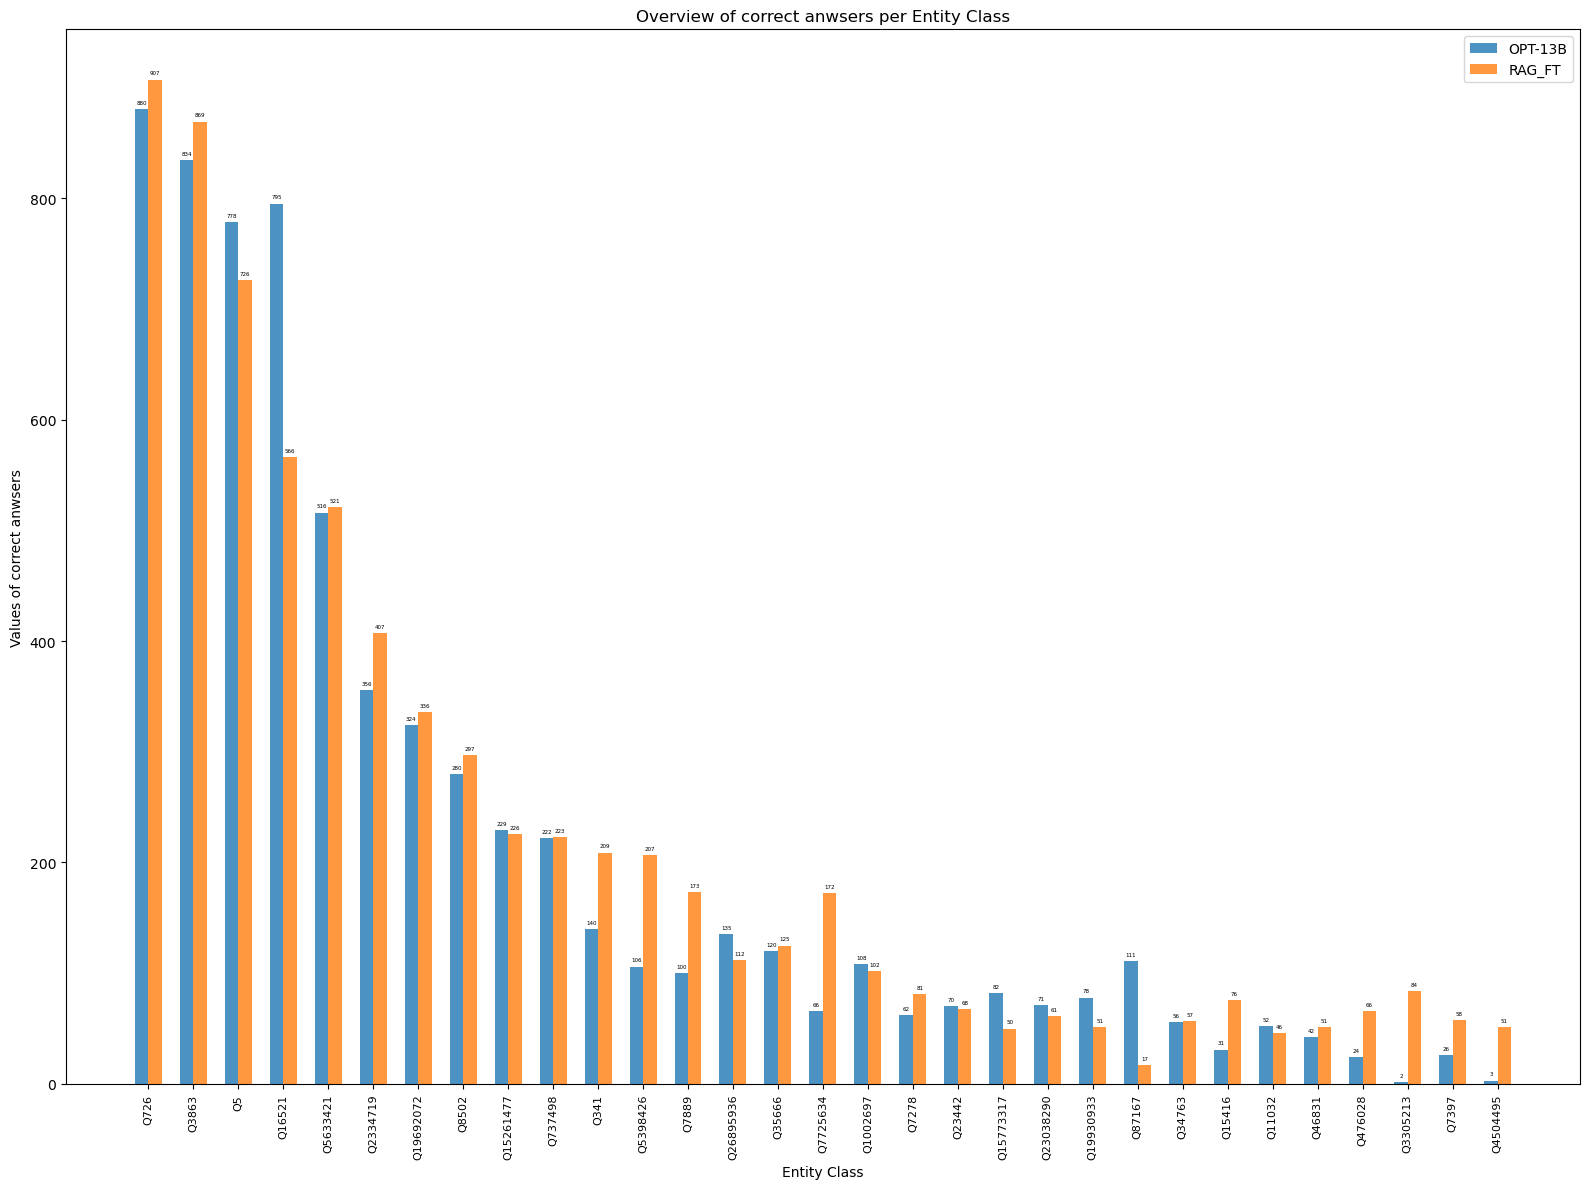

In [125]:
import matplotlib.pyplot as plt

dict1 = sorted_opt_class
dict2 = sorted_rag_ft_class

# Combine the keys and group the corresponding values
dict1_above_50 = {key: value for key, value in dict1.items() if value > 50}
dict2_above_50 = {key: value for key, value in dict2.items() if value > 50}

keys = set(list(dict1_above_50.keys()) + list(dict2_above_50.keys()))
values1 = []#31个大于50的
values2 = []
total_values = []
for key in keys:
    #if dict1.get(key, 0) > 10:
    values1.append(dict1.get(key, 0))
    # else:
    #     values1.append(0)
    #if dict2.get(key, 0) > 10:
    values2.append(dict2.get(key, 0))
    # else:
    #     values2.append(0)
    total_values.append(sum([dict1.get(key, 0), dict2.get(key, 0)]))

keys, values1, values2, total_values = zip(*sorted(zip(keys, values1, values2, total_values), key=lambda x: x[3], reverse=True))

# Create a bar plot
fig, ax = plt.subplots(figsize=(16, 12))
index = range(len(keys))
bar_width = 0.3#0.35
opacity = 0.8

rects1 = ax.bar(index, values1, bar_width,
                alpha=opacity,
                label='OPT-13B')

rects2 = ax.bar([i + bar_width for i in index], values2, bar_width,
                alpha=opacity,
                label='RAG_FT')

ax.set_xlabel('Entity Class')
ax.set_ylabel('Values of correct anwsers')
ax.set_title('Overview of correct anwsers per Entity Class')
ax.set_xticks([i + bar_width / 2 for i in index])
#ax.set_xticklabels(keys)
ax.set_xticklabels(keys, fontsize=8)
ax.legend()
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=8)


# for i, v in enumerate(values1):
#     if v > 0:
#         ax.text(i - bar_width/2, v + 10, str(v), color='blue', fontweight='bold')
# for i, v in enumerate(values2):
#     if v > 0:
#         ax.text(i + bar_width/2, v + 10, str(v), color='green', fontweight='bold')


# Add annotations to the bars
for i, rect in enumerate(rects1):
    ax.annotate(str(values1[i]), xy=(rect.get_x() + rect.get_width() / 2, values1[i]),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=4)
for i, rect in enumerate(rects2):
    ax.annotate(str(values2[i]), xy=(rect.get_x() + rect.get_width() / 2, values2[i]),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=4)


plt.tight_layout()
plt.show()
#plt.savefig('comparison_class_50.pdf', dpi=1200)

新增presentation用图：

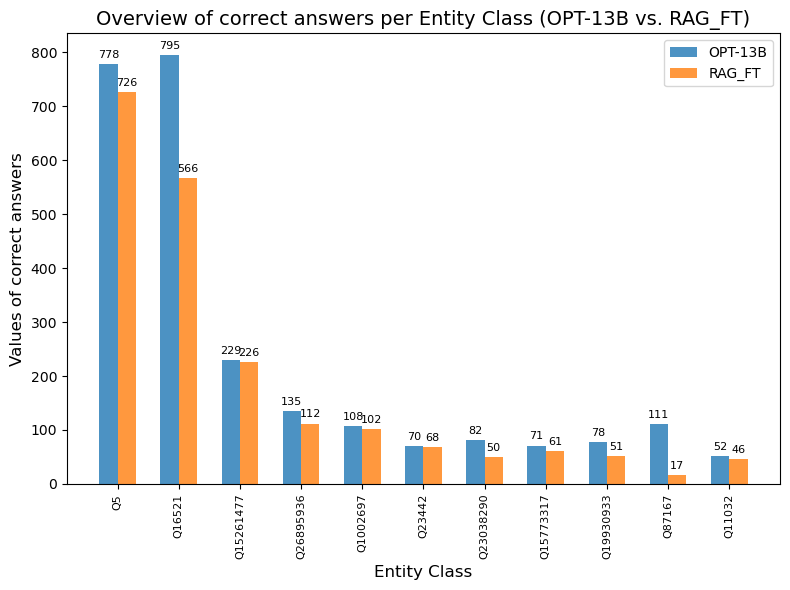

In [128]:
import matplotlib.pyplot as plt

dict1 = sorted_opt_class
dict2 = sorted_rag_ft_class

# Combine the keys and group the corresponding values
dict1_above_50 = {key: value for key, value in dict1.items() if value > 50}
dict2_above_50 = {key: value for key, value in dict2.items() if value > 50}

keys = set(list(dict1_above_50.keys()) + list(dict2_above_50.keys()))
values1 = []
values2 = []
total_values = []
for key in keys:
    value1 = dict1.get(key, 0)
    value2 = dict2.get(key, 0)
    if value1 > value2:
        values1.append(value1)
        values2.append(value2)
        total_values.append(value1 + value2)

keys, values1, values2, total_values = zip(*sorted(zip(keys, values1, values2, total_values), key=lambda x: x[3], reverse=True))

# Increase the figure size
fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(keys))
bar_width = 0.3
opacity = 0.8

rects1 = ax.bar(index, values1, bar_width,
                alpha=opacity,
                label='OPT-13B')

rects2 = ax.bar([i + bar_width for i in index], values2, bar_width,
                alpha=opacity,
                label='RAG_FT')

ax.set_xlabel('Entity Class', fontsize=12)
ax.set_ylabel('Values of correct answers', fontsize=12)
ax.set_title('Overview of correct answers per Entity Class (OPT-13B vs. RAG_FT)', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
lll = ['Q5', 'Q16521', 'Q15261477', 'Q26895936', 'Q1002697', 'Q23442', 'Q23038290', 'Q15773317', 'Q19930933', 'Q87167', 'Q11032']
ax.set_xticklabels(lll, fontsize=8)
ax.legend()
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=8)

for i, rect in enumerate(rects1):
    ax.annotate(str(values1[i]), xy=(rect.get_x() + rect.get_width() / 2, values1[i]),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)
for i, rect in enumerate(rects2):
    ax.annotate(str(values2[i]), xy=(rect.get_x() + rect.get_width() / 2, values2[i]),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()